In [0]:
################################################################### QUESTIONS S#######################################W#########################################

## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes 
##    have to be a part of the analysis and why (5 points)
## 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
## 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters 
##    and do cross validation to find the accuracy. (10 points)

#####################################################################################################################################################################

In [0]:

import pandas as Pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import io
import numpy as np
  
## setting plot style 
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.style.use(['ggplot'])

In [0]:
from google.colab import files
uploaded = files.upload()

Saving vehicle.csv to vehicle.csv


In [0]:
data_raw = Pd.read_csv(io.BytesIO(uploaded['vehicle.csv']))

In [0]:
print(data_raw.shape)
print(data_raw.info())


(846, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows

In [0]:
data_train = data_raw.copy(deep=True)

In [0]:
data_train.head(3)

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car

[3 rows x 19 columns]

In [0]:
############################ Treating the null values #########################################

In [0]:
data_train.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

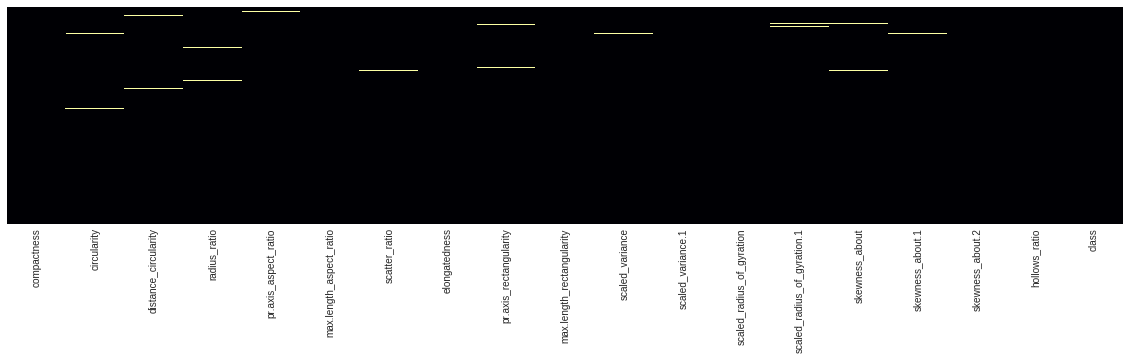

In [0]:
## finding the null and missing values in the database
plt.figure(figsize=(20,4))
plt.style.use(['seaborn-white'])
sns.heatmap(data_train.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 


In [0]:
data_train['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [0]:
data_train_imputer = data_train.copy(deep=True)

In [0]:
def Imputer(dataset,method):
  from sklearn.preprocessing import Imputer
  imputer = Imputer(missing_values=np.nan, strategy=method, axis = 1)  ## mean , median , most_frequent
  columns = dataset.select_dtypes(exclude='object').columns
  X= dataset[columns].values
  imputer = imputer.fit(X[:,:])
  X[:,:] = imputer.transform(X[:, :])
  dataset[columns] = X[:,:]  
  

In [0]:
Imputer(data_train_imputer,'mean')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
data_train_imputer.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

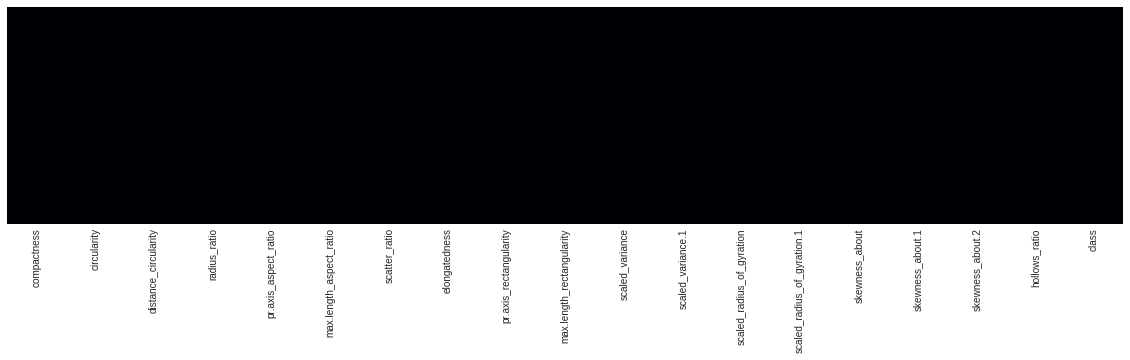

In [0]:
## finding the null and missing values in the database
plt.figure(figsize=(20,4))
plt.style.use(['seaborn-white'])
sns.heatmap(data_train_imputer.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 


In [0]:
data_train_imputer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [0]:
########################### HYPOTHESIS TESTING AFTER NULL FIXING ########################################

In [0]:
from scipy.stats import ttest_ind

def two_sample_ttest(dataset_old,dataset_new,pvalue_H0):
  stat=0
  pvalue=0
  dataset_name1 = dataset_old.copy(deep=True)
  dataset_name2 = dataset_new.copy(deep=True)
  
  col1=dataset_name1.select_dtypes(exclude='object').columns
  col2=dataset_name2.select_dtypes(exclude='object').columns
  if len(col1)==len(col2):
    for i in range(len(col1)):
      #print(i)
      if col1[i]==col2[i]:
               
        stat, pvalue = ttest_ind(dataset_name1[col1[i]].fillna(0) , dataset_name2[col2[i]])
        print("Tstatistic :- {0} , Pvalue :- {1} for column {2} ".format(stat,pvalue,col1[i]))
        print("compare means", dataset_name1[col1[i]].mean() , dataset_name2[col2[i]].mean())
        

        if pvalue > pvalue_H0:
              print('Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- {}'.format(col1[i]))
        else:
              print('Failed , Samples are likely drawn from different distributions (reject H0) for the column :- {}'.format(col1[i]))
        print('.........................................................................................................')
              


In [0]:
two_sample_ttest(data_train,data_train_imputer,0.05)

Tstatistic :- 0.0 , Pvalue :- 1.0 for column compactness 
compare means 93.67848699763593 93.67848699763593
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- compactness
.........................................................................................................
Tstatistic :- -2.007680432416985 , Pvalue :- 0.04483618069268673 for column circularity 
compare means 44.828775267538646 45.40194832661197
Failed , Samples are likely drawn from different distributions (reject H0) for the column :- circularity
.........................................................................................................
Tstatistic :- -0.7050181852830933 , Pvalue :- 0.48089607037014415 for column distance_circularity 
compare means 82.1104513064133 82.2828839869281
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- distance_circularity
.......................................................

In [0]:
############################################### CHECKING THE CLASS IMBALANCE ###############################################

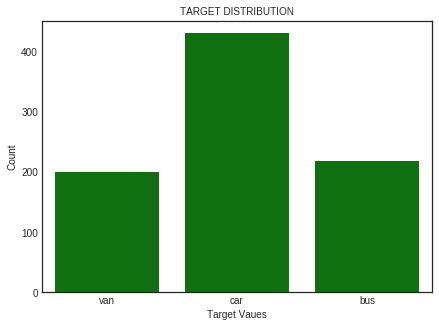

In [0]:
plt.subplots(1,1,figsize=(7,5)) 
plt.style.use(['dark_background'])
g = sns.countplot(x=data_train_imputer['class'], data=data_train_imputer, color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 10)
g.set_xlabel("Target Vaues", fontsize = 10)
g.set_ylabel("Count", fontsize = 10)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data_train_imputer)*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()


In [0]:
########################## Checking the distribution of each attributes through Boxplot and Distribution graph  ###########################################

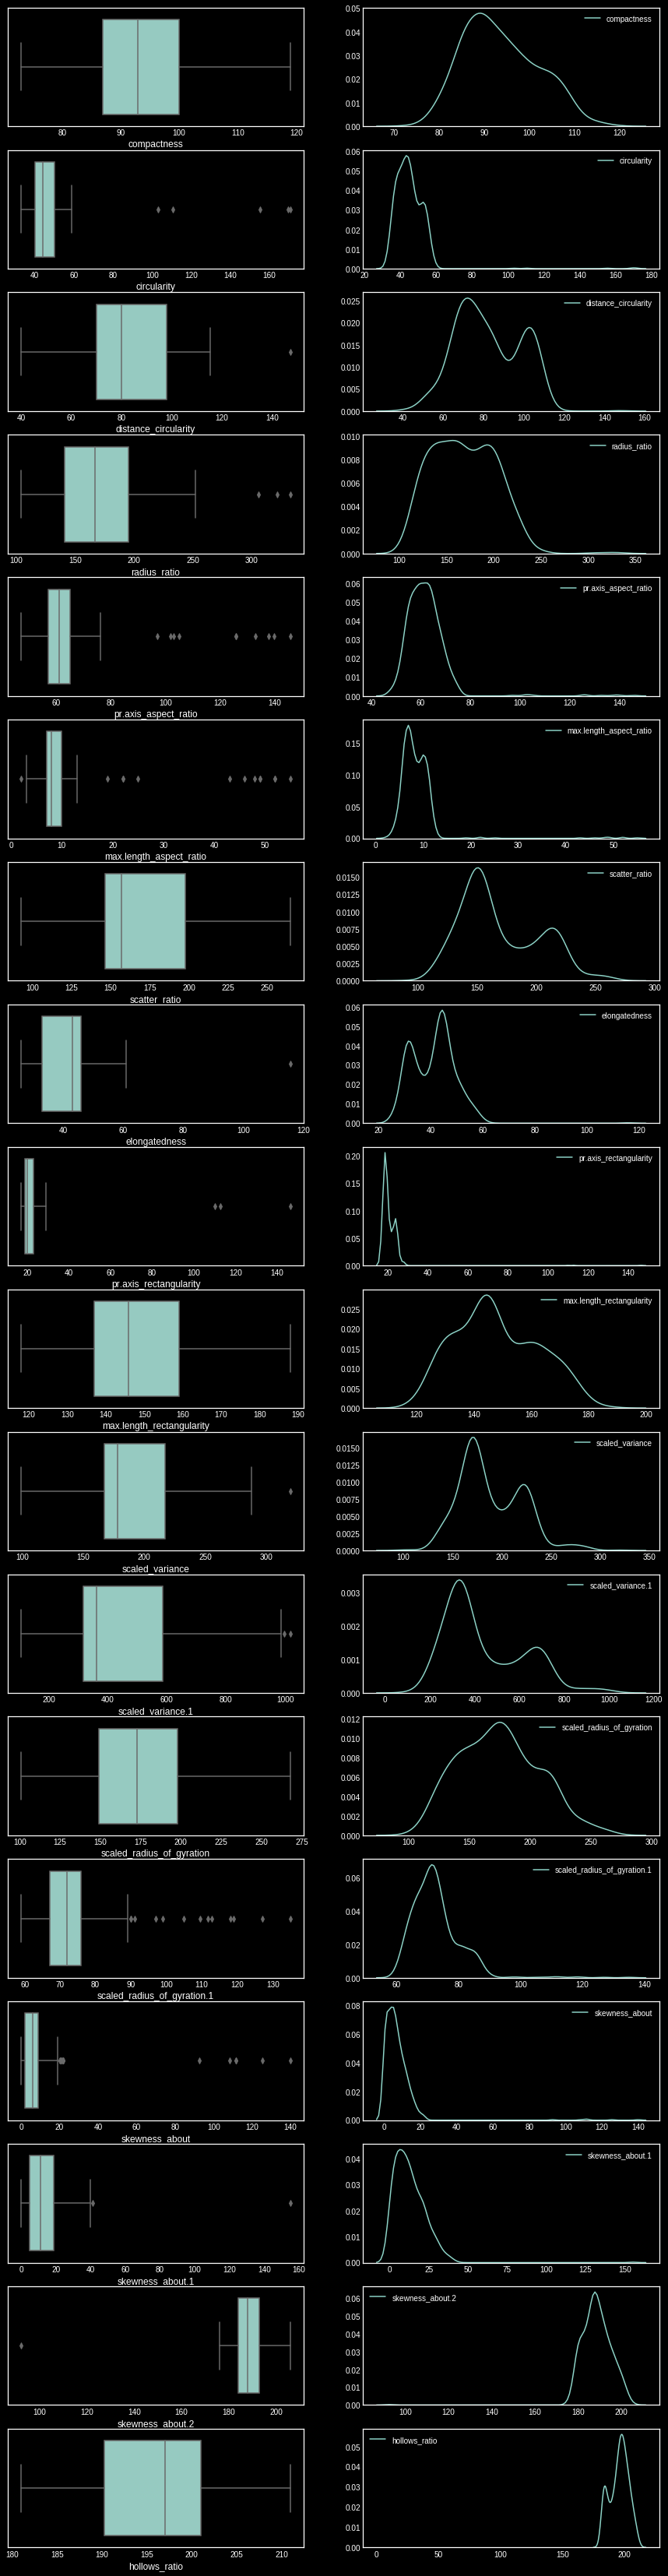

In [0]:
plt.style.use(['dark_background'])



## setting plot style 
#plt.style.use('fivethirtyeight') 

col_d = data_train_imputer.select_dtypes(exclude=['object']).columns
col=2
row = int(np.ceil(len(data_train_imputer.select_dtypes(exclude=['object']).columns)))
fig, qaxis = plt.subplots(row,col,figsize=(15,60))

i=0
j=0
k=0

for i in range (len(col_d)):
  ## plotting line for zero residual error 
  plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  ax1= sns.boxplot(x=data_train_imputer[col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data_train_imputer[col_d[i]],ax = qaxis[j,k]) 
  k=k+1
  j=j
  if k==col:
    j=j+1
    k=0   
   

In [0]:
################# Checking in the pairplot  ##############################################

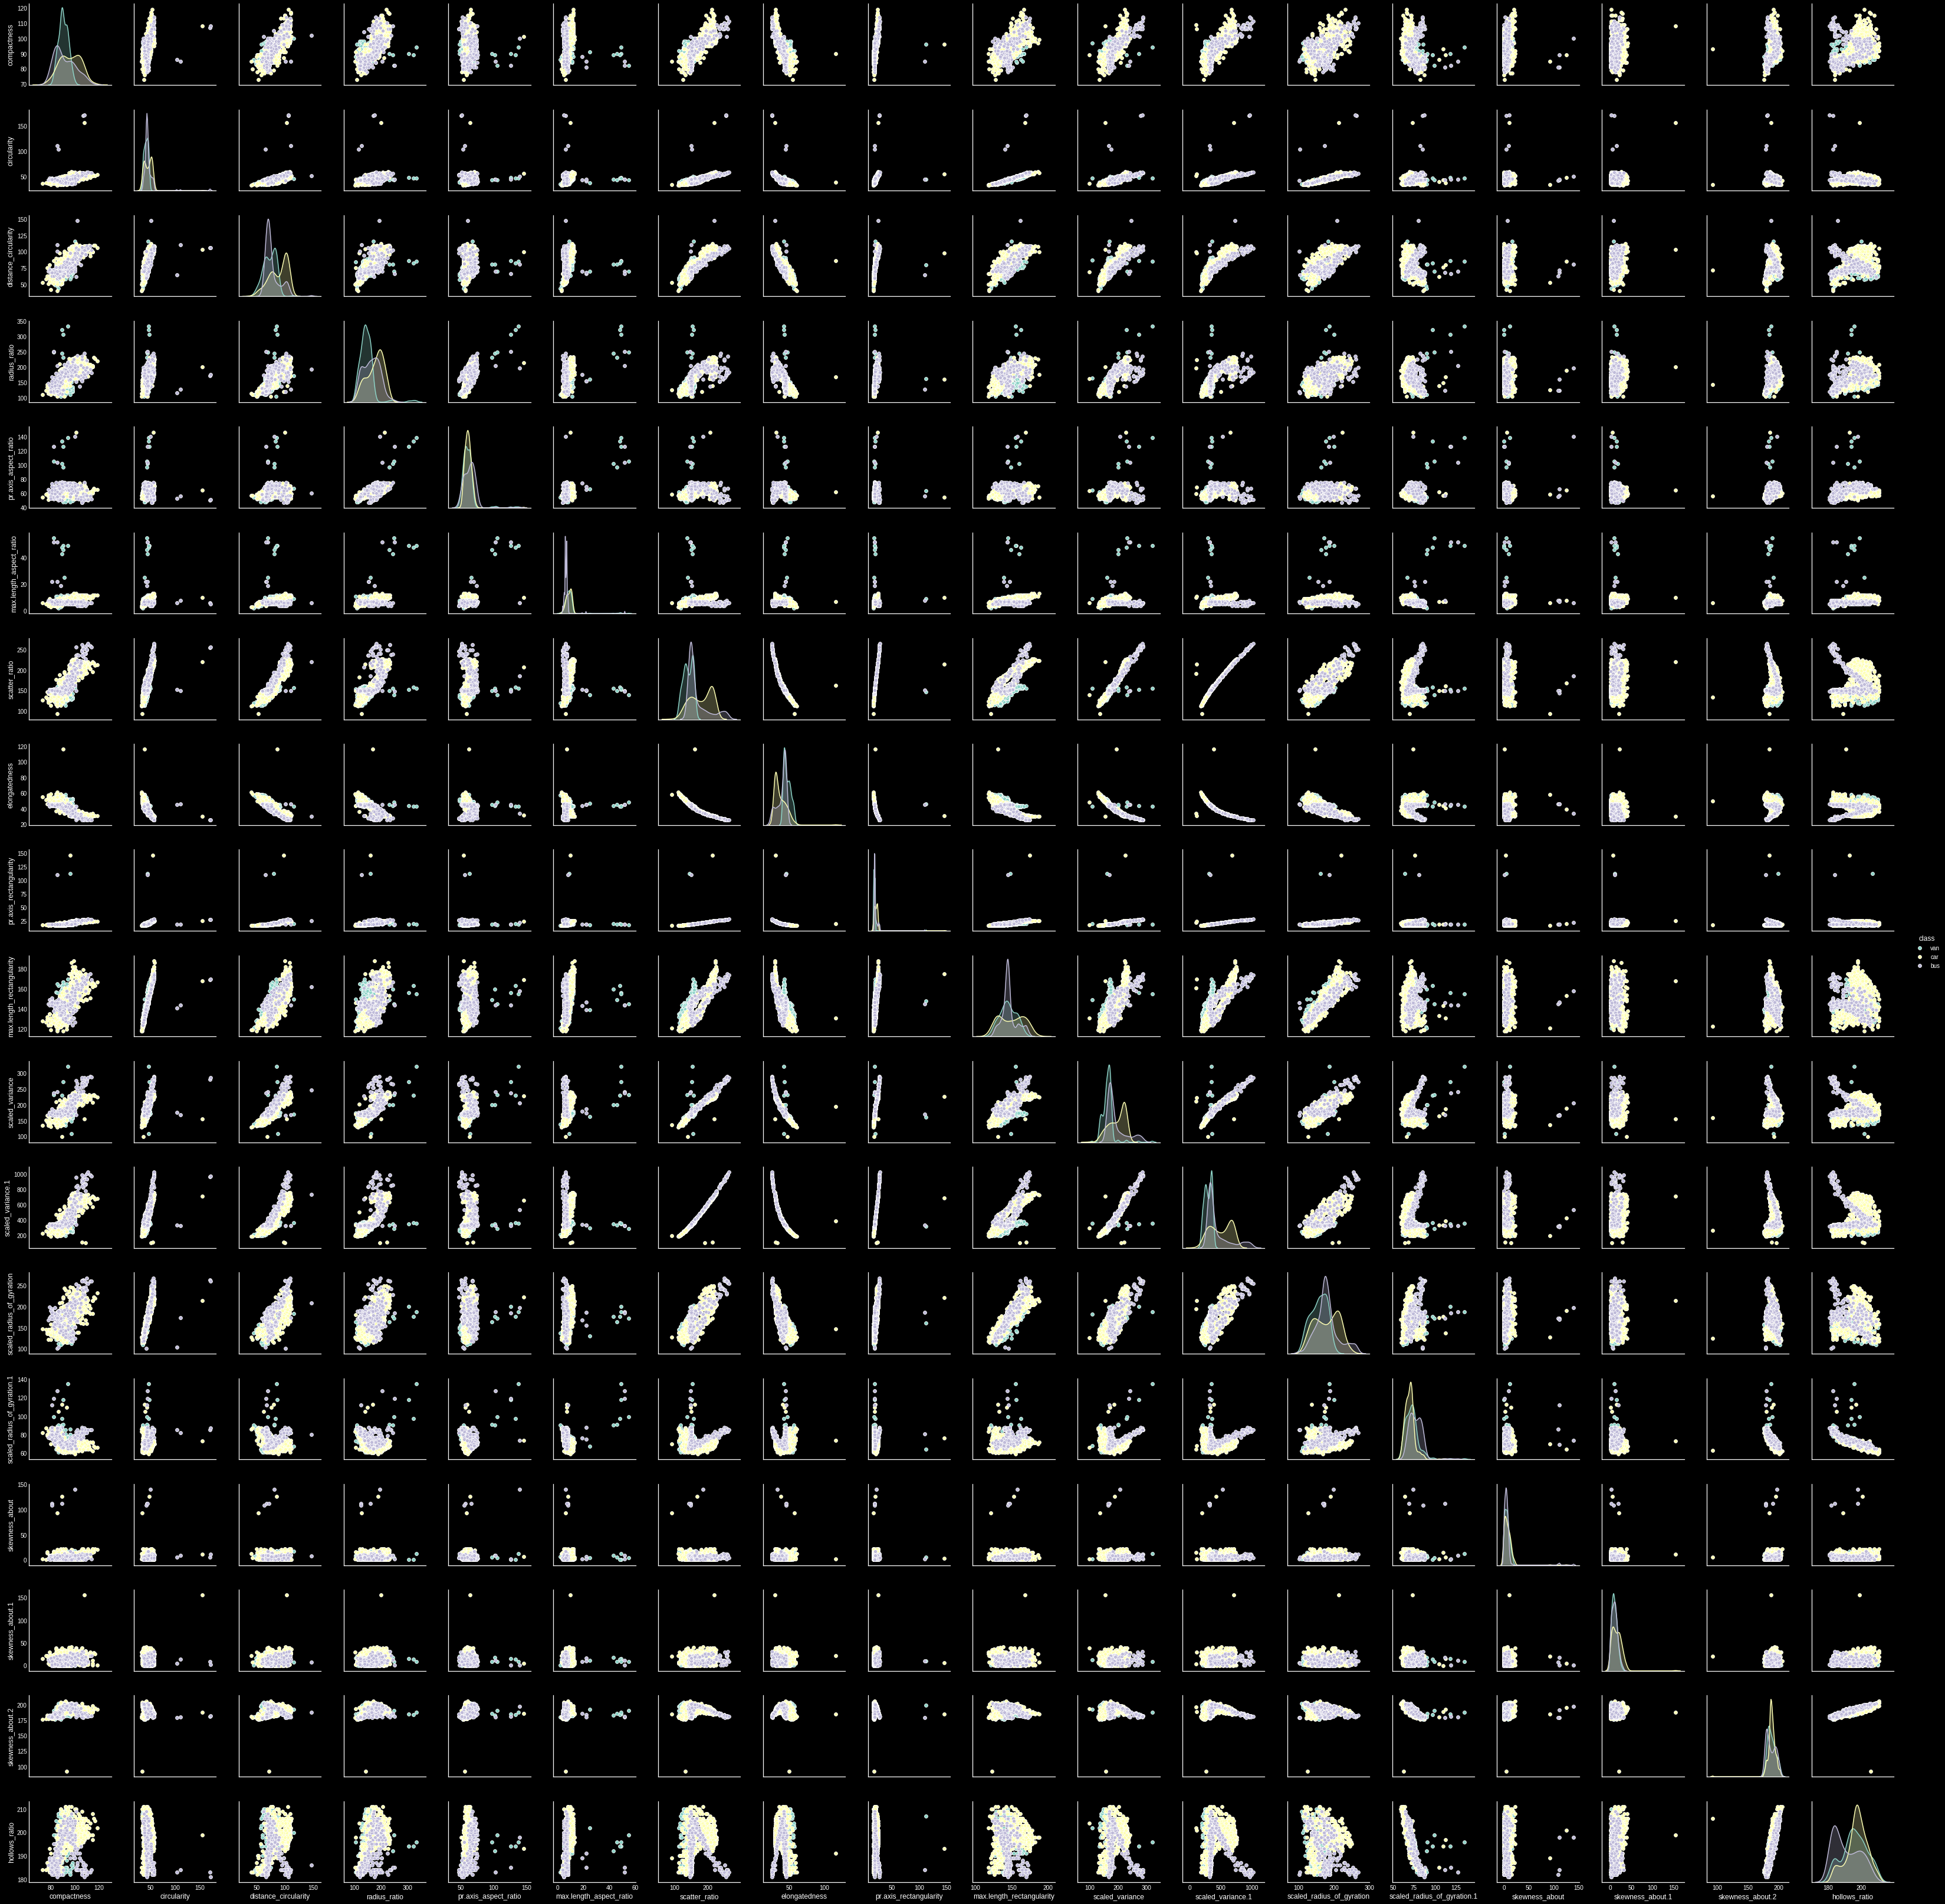

In [0]:
plt.style.use('dark_background')

sns.pairplot(data_train_imputer,diag_kind='kde',hue='class')

In [0]:
####################  As we can see from pairplot , that there is a lot of correlations among different attributes, so will drop the highly correlated columns 

In [0]:
data_train_nw_out = data_train_imputer.copy(deep=True)

In [0]:
################################ OUTLIERS DETECTION #################################
out_compare = Pd.DataFrame(columns=['Column_name'])

col=data_train_nw_out.select_dtypes(exclude='object').columns

for i in range(len(col)):
  
  factor=2.5 
  upper_lmt=data_train_nw_out[col[i]].mean()+data_train_nw_out[col[i]].std()*factor
  lower_lmt=data_train_nw_out[col[i]].mean()-data_train_nw_out[col[i]].std()*factor
  out_compare.loc[i,'Column_name']=col[i]
  out_compare.loc[i,'upper_lmt']=upper_lmt
  out_compare.loc[i,'lower_lmt']=lower_lmt
  out_compare.loc[i,'upper_outlier(%)']='{0:=5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]>upper_lmt)==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
  out_compare.loc[i,'lower_outlier(%)']='{0:<5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]<lower_lmt)==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)


out_compare = out_compare.sort_values(by=['upper_outlier(%)','lower_outlier(%)'],ascending=False)
out_compare.set_index('Column_name',inplace=True)
out_compare

#Capping the outlier rows with Percentiles
#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)

upper_lmt  ...  lower_outlier(%)
Column_name                              ...                  
scaled_variance              267.505843  ...           0.24  %
scaled_variance.1            881.670296  ...           0.00  %
max.length_aspect_ratio       20.070418  ...           0.00  %
pr.axis_aspect_ratio          83.912027  ...           0.00  %
scaled_radius_of_gyration.1   92.363293  ...           0.00  %
scatter_ratio                252.057454  ...           0.00  %
scaled_radius_of_gyration    256.382212  ...           0.00  %
compactness                  114.264673  ...           0.12  %
skewness_about                33.214715  ...           0.00  %
circularity                   70.148905  ...           0.00  %
skewness_about.1              38.235161  ...           0.00  %
radius_ratio                 252.641657  ...           0.00  %
pr.axis_rectangularity        37.684832  ...           0.00  %
max.length_rectangularity    184.287947  ...           0.00  %
distance_circularity         122.242352  ...           0.24  %
elongatedness                 61.582984  ...           0.00  %
skewness_about.2             206.284793  ...           0.12  %
hollows_ratio                214.229381  ...           0.00  %

[18 rows x 4 columns]

In [0]:
#################### OUTLIERS TREATMENT and Verifying it after the treatment  ##############################################

col=data_train_nw_out.select_dtypes(exclude='object').columns
out_fx_compare = Pd.DataFrame(columns=['Column_name'])

for i in range(len(col)):
  #repl_value = out_compare.loc[col[i],'upper_lmt']
  repl_value = data_train_nw_out[col[i]].mean()
  #print('column {}:- has mean value {}'.format(col[i],repl_value))
  data_train_nw_out[col[i]].replace(data_train_nw_out[(data_train_nw_out[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement upper limit
  data_train_nw_out[col[i]].replace(data_train_nw_out[(data_train_nw_out[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]],repl_value,inplace=True) ## value replacement lower limit
  
  out_fx_compare.loc[i,'Column_name']=col[i]
  out_fx_compare.loc[i,'upper_lmt_old']=out_compare.loc[col[i],'upper_lmt']
  out_fx_compare.loc[i,'lower_lmt_old']=out_compare.loc[col[i],'lower_lmt']
  out_fx_compare.loc[i,'upper_outlier_nw(%)']='{0:=5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
  out_fx_compare.loc[i,'lower_outlier_nw(%)']='{0:<5.2f} %'.format((data_train_nw_out[(data_train_nw_out[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]].count()/data_train_nw_out[col[i]].count())*100)
 
out_fx_compare = out_fx_compare.sort_values(by=['upper_lmt_old'],ascending=False)
out_fx_compare.set_index('Column_name',inplace=True)
out_fx_compare


upper_lmt_old  ...  lower_outlier_nw(%)
Column_name                                 ...                     
scaled_variance.1               881.670296  ...              0.00  %
scaled_variance                 267.505843  ...              0.00  %
scaled_radius_of_gyration       256.382212  ...              0.00  %
radius_ratio                    252.641657  ...              0.00  %
scatter_ratio                   252.057454  ...              0.00  %
hollows_ratio                   214.229381  ...              0.00  %
skewness_about.2                206.284793  ...              0.00  %
max.length_rectangularity       184.287947  ...              0.00  %
distance_circularity            122.242352  ...              0.00  %
compactness                     114.264673  ...              0.00  %
scaled_radius_of_gyration.1      92.363293  ...              0.00  %
pr.axis_aspect_ratio             83.912027  ...              0.00  %
circularity                      70.148905  ...              0.00  %
elongatedness                    61.582984  ...              0.00  %
skewness_about.1                 38.235161  ...              0.00  %
pr.axis_rectangularity           37.684832  ...              0.00  %
skewness_about                   33.214715  ...              0.00  %
max.length_aspect_ratio          20.070418  ...              0.00  %

[18 rows x 4 columns]

In [0]:
#################################### COMPARING BEFORE AND AFTER OUTLIER FIXING #########################################

In [0]:
data_train_nw = data_train_imputer.copy(deep=True)

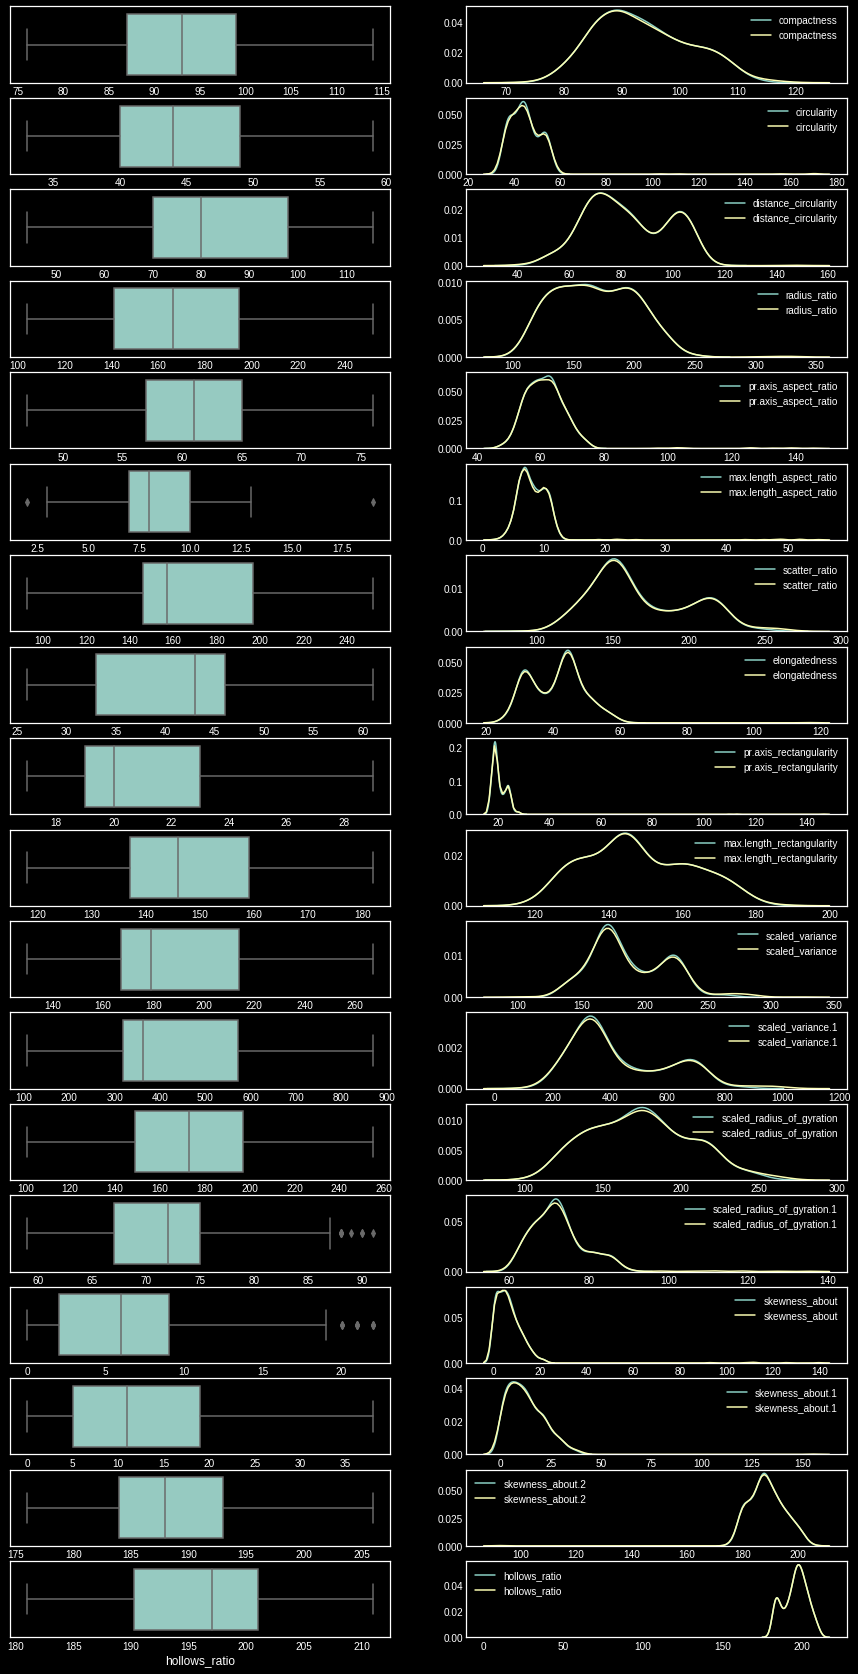

In [0]:
col_d = data_train_nw_out.select_dtypes(exclude=['object']).columns
col=2
row = int(np.ceil(len(data_train_nw_out.select_dtypes(exclude=['object']).columns)))
fig, qaxis = plt.subplots(row,col,figsize=(15,30))

i=0
j=0
k=0

for i in range (len(col_d)):
  
  ## plotting line for zero residual error 
  plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  
  ax1= sns.boxplot(x=data_train_nw_out[col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data_train_nw_out[col_d[i]],ax = qaxis[j,k])       ## dataset after outlier treatment
  ax2=sns.kdeplot(data_train_imputer[col_d[i]],ax = qaxis[j,k])  ## dataset before outlier treatment
  k=k+1
  j=j
  if k==col:
    j=j+1
    k=0   
   

In [0]:
########################### HYPOTHESIS TESTING AFTER OUTLIERS FIXING ########################################

In [0]:
from scipy.stats import ttest_ind


def two_sample_ttest(dataset_old,dataset_new,pvalue_H0):
  stat=0
  pvalue=0
  dataset_name1 = dataset_old.copy(deep=True)
  dataset_name2 = dataset_new.copy(deep=True)
  
  col1=dataset_name1.select_dtypes(exclude='object').columns
  col2=dataset_name2.select_dtypes(exclude='object').columns
  if len(col1)==len(col2):
    for i in range(len(col1)):
      #print(i)
      if col1[i]==col2[i]:
               
        stat, pvalue = ttest_ind(dataset_name1[col1[i]].fillna(0) , dataset_name2[col2[i]])
        print("Tstatistic :- {0} , Pvalue :- {1} for column {2} ".format(stat,pvalue,col1[i]))
        print("compare means", dataset_name1[col1[i]].mean() , dataset_name2[col2[i]].mean())
        

        if pvalue > pvalue_H0:
              print('Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- {}'.format(col1[i]))
        else:
              print('Failed , Samples are likely drawn from different distributions (reject H0) for the column :- {}'.format(col1[i]))
        print('.........................................................................................................')
              


In [0]:
two_sample_ttest(data_raw,data_train_nw_out,0.05)

Tstatistic :- 0.3425617603668371 , Pvalue :- 0.731970773425148 for column compactness 
compare means 93.67848699763593 93.54343901771094
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- compactness
.........................................................................................................
Tstatistic :- -0.8364048481065844 , Pvalue :- 0.4030454312661427 for column circularity 
compare means 44.828775267538646 44.83216281516909
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- circularity
.........................................................................................................
Tstatistic :- -0.7372838258420248 , Pvalue :- 0.4610521118260562 for column distance_circularity 
compare means 82.1104513064133 82.30356449612941
Passed , Samples are likely drawn from the same distributions (fail to reject H0) for the column :- distance_circularity
...................

In [0]:
#################### 3- Correlation Matrix with Heatmap ####################################
plt.style.use('ggplot') 

#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(15,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap = colormap,square=True,cbar_kws={'shrink':.8 }, ax=ax,annot=True,linewidths=0.1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

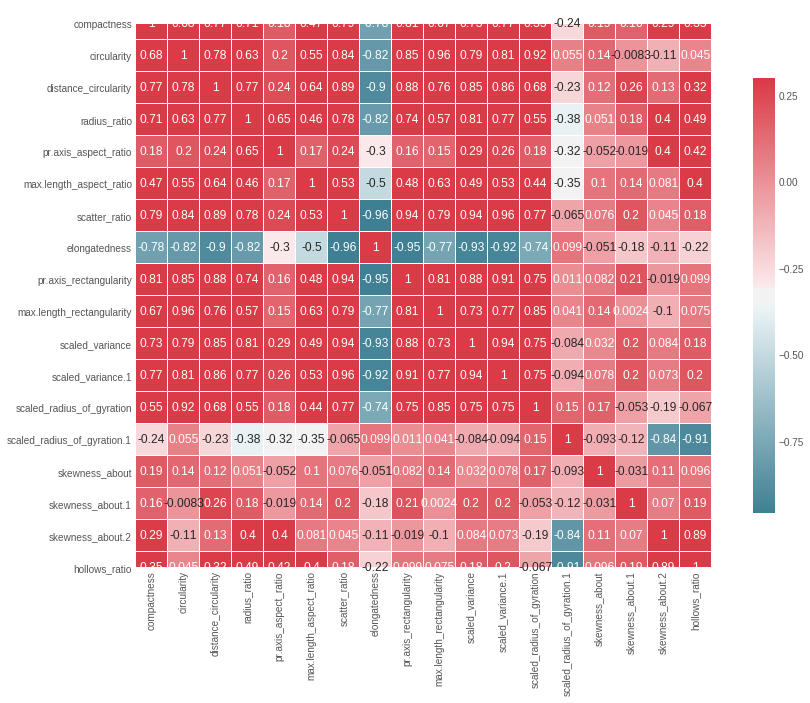

In [0]:
correlation_heatmap(data_train_nw_out)

In [0]:
data_train_nw_out.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [0]:
##################################################### LABEL ENCODING #####################################################################################
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data_train_nw_out['class_cd']= label_encoder.fit_transform(data_train_nw_out['class']) 
  
data_train_nw_out['class_cd'].unique() 

array([2, 1, 0])

In [0]:
#################### 1- SelectKBest , 2- Feature Importance   ####################################

#apply SelectKBest class to extract top 10 best features score_func=chi2
from sklearn.feature_selection import chi2,f_classif,f_regression,f_oneway,SelectKBest
from  sklearn.ensemble import ExtraTreesClassifier

columns = data_train_nw_out.columns
y1= data_train_nw_out['class_cd'].values
X1=data_train_nw_out.drop(columns=['class','class_cd']).values

feature_compare_tbl = Pd.DataFrame({'Attributes':columns})
no_of_selected_features = 12

score_f = [chi2,f_classif,f_regression,f_oneway,ExtraTreesClassifier]
i=0
for i in range(len(score_f)):
  if score_f[i].__name__== 'ExtraTreesClassifier':
    model = ExtraTreesClassifier(criterion='entropy')
    model.fit(X1,y1)
    scores = Pd.DataFrame(model.feature_importances_)
    feature_compare_tbl = Pd.concat([feature_compare_tbl,scores],axis=1)
    feature_compare_tbl.rename(columns={0:'Feature_importance'}, inplace=True)
  else:
    bestfeatures = SelectKBest(score_func=score_f[i], k=no_of_selected_features)
    fit = bestfeatures.fit(X1,y1)
    scores = Pd.DataFrame(fit.scores_)  
    feature_compare_tbl = Pd.concat([feature_compare_tbl,scores],axis=1)
    feature_compare_tbl.rename(columns={0:score_f[i].__name__ }, inplace=True)
      
feature_compare_tbl.sort_values(by=['f_regression','chi2','f_classif','f_oneway','Feature_importance'],ascending=False,inplace=True)


feature_compare_tbl.set_index('Attributes')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


chi2  ...  Feature_importance
Attributes                                 ...                    
elongatedness                  326.333189  ...            0.087005
max.length_aspect_ratio         99.653469  ...            0.109857
scaled_variance                879.551161  ...            0.060986
scaled_radius_of_gyration.1     89.240829  ...            0.038520
pr.axis_rectangularity          56.414919  ...            0.082695
scatter_ratio                 1255.700656  ...            0.077013
hollows_ratio                   29.277924  ...            0.058397
scaled_variance.1            12895.982274  ...            0.057706
scaled_radius_of_gyration      409.907551  ...            0.036958
radius_ratio                  1030.634258  ...            0.027192
pr.axis_aspect_ratio            19.167020  ...            0.062392
circularity                     47.788623  ...            0.051344
skewness_about                 119.007693  ...            0.019519
skewness_about.2                 2.111015  ...            0.038617
distance_circularity           500.710344  ...            0.061331
compactness                     53.631952  ...            0.046374
max.length_rectangularity       22.411980  ...            0.057099
skewness_about.1               426.271859  ...            0.026997
class                                 NaN  ...                 NaN
class_cd                              NaN  ...                 NaN

[20 rows x 5 columns]

In [0]:
## taking  the high feature importance

## data_train_nw_out_KBest = data_train_nw_out[['elongatedness','max.length_aspect_ratio','scaled_variance','scaled_radius_of_gyration.1','pr.axis_rectangularity','scatter_ratio',
##                                             'hollows_ratio','scaled_variance.1','scaled_radius_of_gyration','radius_ratio','pr.axis_aspect_ratio','pr.axis_aspect_ratio']]

In [0]:
# data_train_nw_out_KBest.head()

In [0]:
## dropping the highly correlated attributes >0.7

data_train_nw_out.drop(columns=['compactness','circularity','distance_circularity','radius_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','skewness_about.1','skewness_about.2'],axis=1,inplace=True)

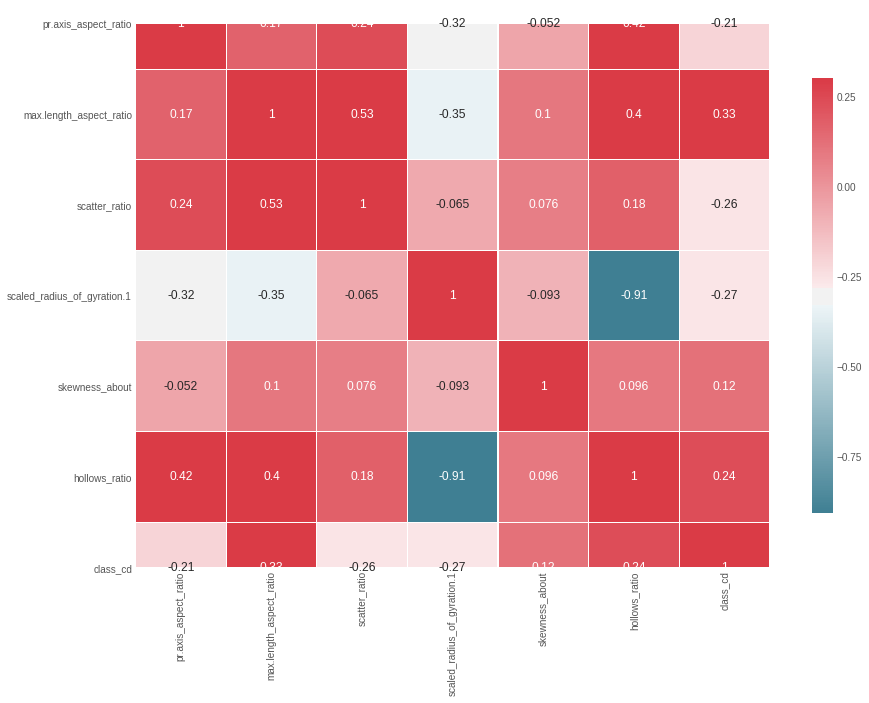

In [0]:
correlation_heatmap(data_train_nw_out)

In [0]:
data_train_nw_out['class'].unique() 

array(['van', 'car', 'bus'], dtype=object)

In [0]:
data_train_nw_out.columns

Index(['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration.1', 'skewness_about', 'hollows_ratio',
       'class', 'class_cd'],
      dtype='object')

In [0]:
data_train_nw_out_Independent_cols = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration.1', 'skewness_about', 'hollows_ratio']

data_train_nw_out_Dependent_cols = ['class_cd']

In [0]:
############################### FEATURE SCALING  ###########################

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = MinMaxScaler()

data_train_z = scaler.fit_transform(data_train_nw_out[data_train_nw_out_Independent_cols])

data_train_z = Pd.DataFrame(data_train_z,columns=data_train_nw_out_Independent_cols)

# data_train_z = data_train.apply(zscore)

In [0]:
data_train_z.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  skewness_about  hollows_ratio
0              0.862069                 0.470588  ...        0.272727       0.533333
1              0.344828                 0.411765  ...        0.409091       0.600000
2              0.655172                 0.470588  ...        0.636364       0.500000
3              0.551724                 0.411765  ...        0.272727       0.866667
4              0.512791                 0.386316  ...        0.409091       0.066667

[5 rows x 6 columns]

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
silhouette_scr =[]
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(data_train_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
  silhouette_avg = silhouette_score(data_train_z, labels)
  silhouette_scr.append(silhouette_avg)
  
clusters_df = Pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "silhouette_avg": silhouette_scr} )
clusters_df

num_clusters  cluster_errors  silhouette_avg
0             2      137.471822        0.307531
1             3      114.260808        0.245470
2             4       99.861036        0.237390
3             5       88.066712        0.223079

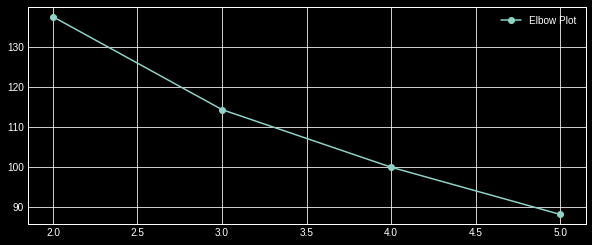

In [0]:
# Elbow plot for the cluster_errors
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.figure(figsize=(10,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ,label='Elbow Plot')
plt.legend()

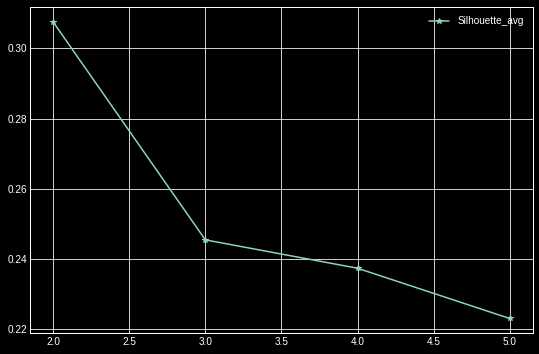

In [0]:
# Elbow plotfor the silhouette_avg
# plt.style.use('fivethirtyeight') 
plt.style.use(['dark_background'])
plt.figure(figsize=(9,6))
plt.plot( clusters_df.num_clusters, clusters_df.silhouette_avg, marker = "*" ,label='Silhouette_avg')
plt.legend()

For n_clusters = 2 The average silhouette_score is : 0.5828920017175838


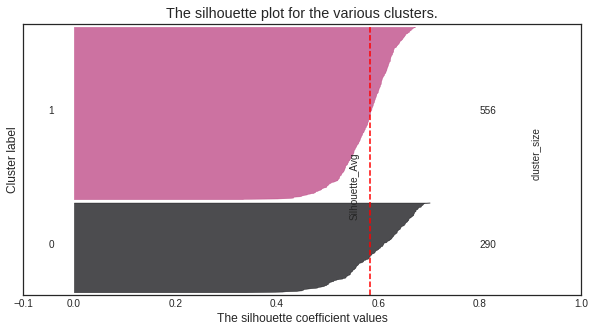

For n_clusters = 3 The average silhouette_score is : 0.6178018162057537


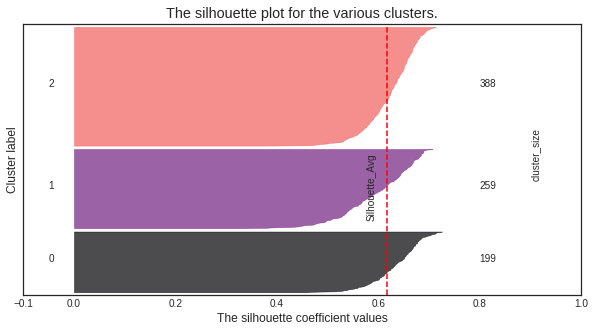

For n_clusters = 4 The average silhouette_score is : 0.6269672302112339


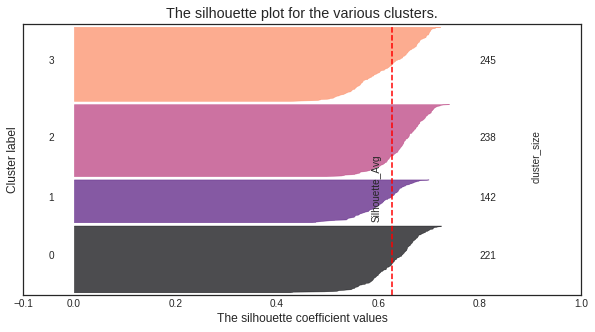

For n_clusters = 5 The average silhouette_score is : 0.654326207342773


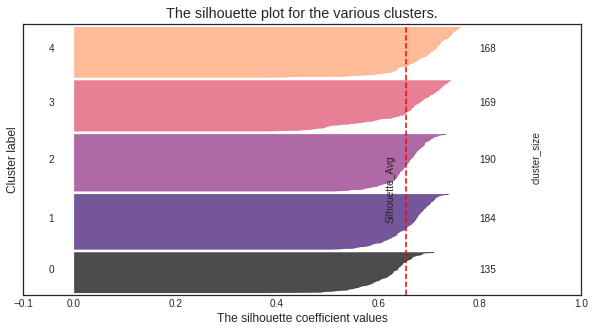

In [0]:
range_n_clusters = range( 2, 6)
plt.style.use('seaborn-white')

for n_clusters in range_n_clusters:
  
    data_train_z_nw = data_train_z.copy(deep = True) 
    
   
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10,5)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_train_z_nw) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_train_z_nw)
    
    clusterer.fit(data_train_z_nw)

    prediction=clusterer.predict(data_train_z_nw)  ## predicting the derived cluster value to each datapoint
    data_train_z_nw["Labels_KM"] = prediction # Creating a new column "Labels_KM" which will hold the cluster id of each record
    cnt_df = data_train_z_nw.groupby("Labels_KM").count()
    col_nm = data_train_z_nw.columns[0]
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_train_z_nw, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_train_z_nw, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values =  sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.get_cmap('magma')(float(i) / n_clusters) ## Spectral, inferno , plasma , viridis , magma , cividis 
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
        
        

        
        cluster_size = str(cnt_df.loc[i,col_nm])
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Label the silhouette plots with their cluster size at the middle
        
        ax1.text(0.8, y_lower + 0.5 * size_cluster_i, cluster_size)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples 
        
    ax1.text(0.9,380, "cluster_size",rotation=90) 
    ax1.text(silhouette_avg-0.04,250, "Silhouette_Avg",rotation=90)
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    plt.show()
    

In [0]:
# The Silhoutte graph  confirms our visual analysis that there are likely 4 good clusters - Balanced
# Let us start with 4 clusters

In [0]:
data_train_z_nw = data_train_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [0]:
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(data_train_z_nw)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [0]:
data_train_z_nw.shape

(846, 6)

In [0]:
centroids = cluster.cluster_centers_
centroids.shape

(4, 6)

In [0]:
centroid_df = Pd.DataFrame(centroids, columns = list(data_train_z_nw) )
centroid_df

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  skewness_about  hollows_ratio
0              0.596981                 0.457760  ...        0.199017       0.538830
1              0.549453                 0.331611  ...        0.188235       0.661742
2              0.337125                 0.279564  ...        0.267949       0.180632
3              0.501069                 0.431192  ...        0.638620       0.644917

[4 rows x 6 columns]

In [0]:
prediction=cluster.predict(data_train_z)  ## predicting the derived cluster value to each datapoint

prediction

array([0, 1, 3, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2,
       1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 3, 2, 1, 0, 2, 0, 2, 2, 1,
       3, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 2, 3, 3, 3, 0, 0, 0, 1, 2, 0,
       1, 1, 2, 2, 3, 3, 0, 3, 2, 1, 2, 2, 1, 3, 1, 3, 2, 2, 1, 0, 3, 1,
       1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 0, 2, 3, 0, 3, 1, 3, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 3, 2, 3, 1, 1, 0, 0, 1, 3, 2, 2, 0, 2, 3, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 3, 0, 1, 3, 1, 3, 2, 1, 2, 3, 2,
       2, 2, 0, 1, 3, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 3,
       0, 2, 0, 2, 2, 1, 3, 1, 3, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 3,
       2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 3, 1, 3, 0, 0, 2, 1, 1, 1,
       3, 2, 2, 3, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 3, 1, 1, 2, 2, 3, 2, 1,
       1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 3, 1, 0,

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(prediction,np.array(data_train_nw_out['class_cd']))

array([[ 27, 149,  12,   0],
       [ 73, 100,  91,   0],
       [114,  72,  67,   0],
       [  4, 108,  29,   0]])

In [0]:
data_train_nw_out["Labels_KM_4"] = prediction # Creating a new column "Labels_KM" which will hold the cluster id of each record

In [0]:
data_train_nw_out.groupby("Labels_KM_4").count()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  class  class_cd
Labels_KM_4                                                 ...                 
0                             188                      188  ...    188       188
1                             264                      264  ...    264       264
2                             253                      253  ...    253       253
3                             141                      141  ...    141       141

[4 rows x 8 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f118d0adda0>,
      dtype=object)

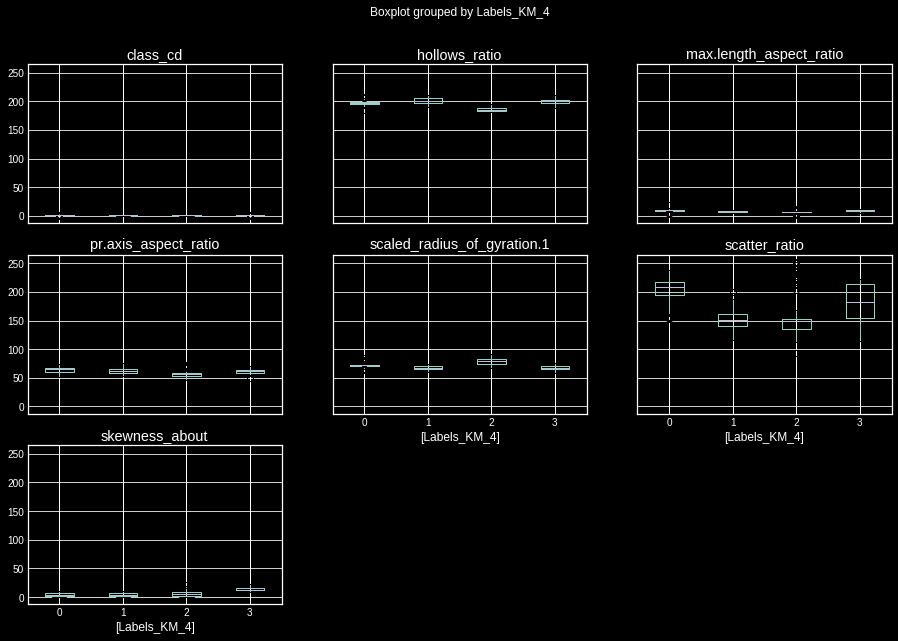

In [0]:
import matplotlib.pylab as plt
plt.style.use(['dark_background'])

data_train_nw_out.boxplot(by = 'Labels_KM_4', figsize=(15, 10))

**AgglomerativeClustering - Cluster Number = 4**

In [0]:
##  More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters=4 ,affinity='euclidean',  linkage='average') 

## ## centroid distance, “ward” [minimum variance method], “complete”[Maximum distance], “average”, “single”[Minimum distance]

In [0]:
print(data_train_z.columns)
print(data_train_nw_out.columns)

Index(['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration.1', 'skewness_about', 'hollows_ratio'],
      dtype='object')
Index(['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration.1', 'skewness_about', 'hollows_ratio',
       'class', 'class_cd', 'Labels_KM_4'],
      dtype='object')


In [0]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [0]:
data_train_nw_out['Labels_avAG_4'] = model.labels_

In [0]:
data_train_nw_out.groupby(["Labels_avAG_4"]).count()

pr.axis_aspect_ratio  ...  Labels_KM_4
Labels_avAG_4                        ...             
0                               174  ...          174
1                                15  ...           15
2                               656  ...          656
3                                 1  ...            1

[4 rows x 9 columns]

In [0]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [0]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [0]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'average')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.6577642375344521

In [0]:
Z.shape


(845, 4)

In [0]:
## The y-axis contains the samples and x-axis represents the distance between these samples. The horizontal line with maximum distance is the blue 
## line and hence we can decide a threshold of 6 and cut the dendrogram:

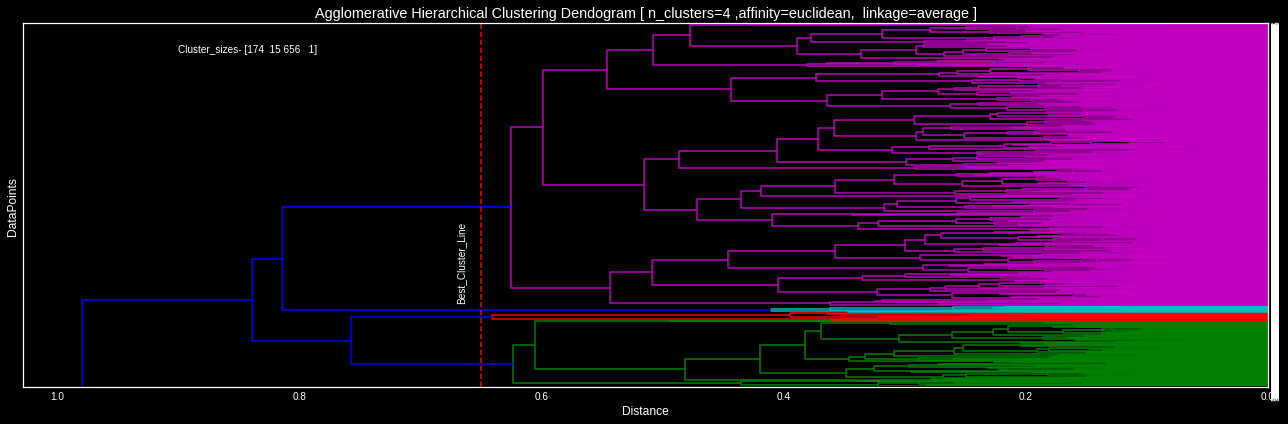

In [0]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=4 ,affinity=euclidean,  linkage=average ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')
# The vertical line for average silhouette score of all the values



best_line = 0.65

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )

plt.axvline(x=best_line, color='r', linestyle='--')
## setting plot style 
plt.style.use(['dark_background'])
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2) 
  
plt.text(best_line+0.02,2000,"Best_Cluster_Line",rotation=90)
plt.text(0.9,7800,"Cluster_sizes- {}".format(np.array(data_train_nw_out.groupby(["Labels_avAG_4"]).count())[:,1]),rotation=0)
plt.tight_layout()

In [0]:
model = AgglomerativeClustering(n_clusters=4 ,affinity='euclidean',  linkage='complete') ## “ward”, “complete”, “average”, “single”

In [0]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [0]:
data_train_nw_out['Labels_cmAG_4'] = model.labels_

In [0]:
data_train_nw_out.groupby(["Labels_cmAG_4"]).count()

pr.axis_aspect_ratio  ...  Labels_avAG_4
Labels_cmAG_4                        ...               
0                               313  ...            313
1                               162  ...            162
2                               222  ...            222
3                               149  ...            149

[4 rows x 10 columns]

In [0]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'complete')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.5251019856440701

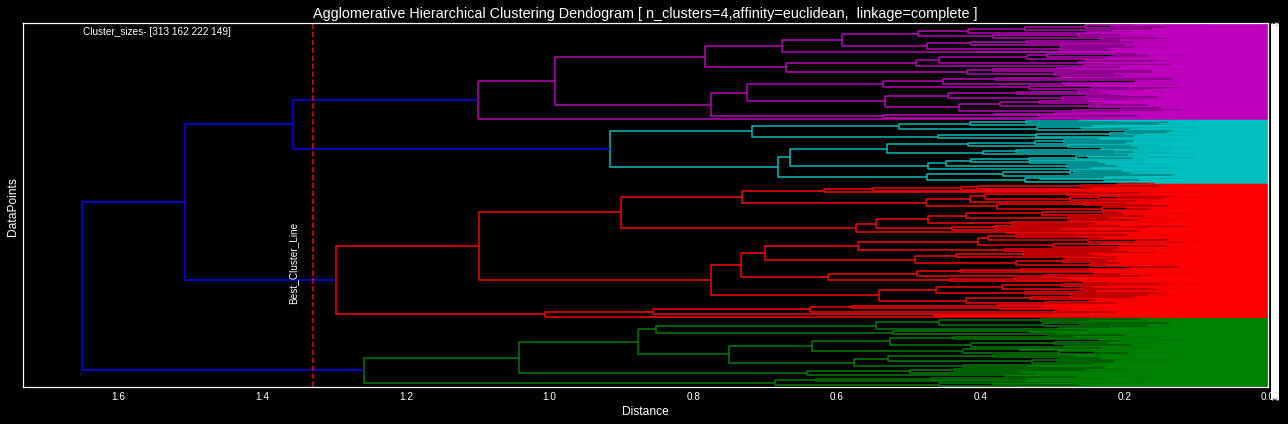

In [0]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=4,affinity=euclidean,  linkage=complete ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')

best_line =1.33

ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )
plt.axvline(x=best_line, color='r', linestyle='--')
plt.text(best_line+0.034,2000,"Best_Cluster_Line",rotation=90)
plt.text(1.65,8200,"Cluster_sizes- {}".format(np.array(data_train_nw_out.groupby(["Labels_cmAG_4"]).count())[:,1]),rotation=0)
plt.tight_layout()

In [0]:
model = AgglomerativeClustering(n_clusters=4 ,affinity='euclidean',  linkage='ward') 

## centroid distance, “ward”, “complete”[Maximum distance], “average”, “single”[Minimum distance]

In [0]:
model.fit(data_train_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [0]:
data_train_nw_out['Labels_wdAG_4'] = model.labels_

In [0]:
data_train_nw_out.groupby(["Labels_wdAG_4"]).count()

pr.axis_aspect_ratio  ...  Labels_cmAG_4
Labels_wdAG_4                        ...               
0                               318  ...            318
1                               180  ...            180
2                               175  ...            175
3                               173  ...            173

[4 rows x 11 columns]

In [0]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_train_z, 'ward')
c, coph_dists = cophenet(Z , pdist(data_train_z))

c

0.5308944914324929

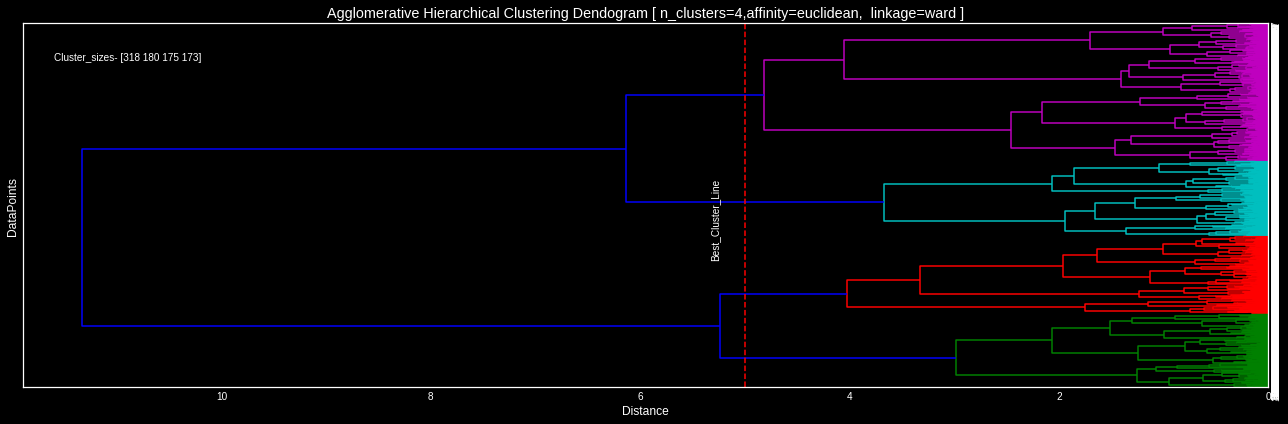

In [0]:
plt.figure(figsize=(18,6))
plt.title('Agglomerative Hierarchical Clustering Dendogram [ n_clusters=4,affinity=euclidean,  linkage=ward ]')
plt.xlabel('Distance')
plt.ylabel('DataPoints')

best_line = 5.0
ax=dendrogram(Z, leaf_rotation=90.,color_threshold=best_line,  leaf_font_size=10.,orientation='left' )


plt.axvline(x=best_line, color='r', linestyle='--')
plt.text(best_line+0.33,3000,"Best_Cluster_Line",rotation=90)
plt.text(11.6,7600,"Cluster_sizes- {}".format(np.array(data_train_nw_out.groupby(["Labels_wdAG_4"]).count())[:,1]),rotation=0)
plt.tight_layout()

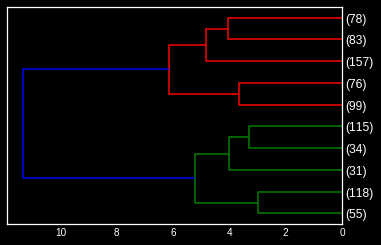

In [0]:
dendrogram(Z, truncate_mode='lastp',  p=10 , orientation ='left')
plt.style.use('seaborn-white')
# show only the last p merged clusters || 'mtica' is an alias for 'level' that’s kept for backward compatibility.
     # show only the last p merged clusters

plt.show()

In [0]:
############################################################################################################################################################################################
############################################################################################################################################################################################

In [0]:
data_train_nw_out.columns

Index(['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration.1', 'skewness_about', 'hollows_ratio',
       'class', 'class_cd', 'Labels_KM_4', 'Labels_avAG_4', 'Labels_cmAG_4',
       'Labels_wdAG_4'],
      dtype='object')

In [0]:
## We have 4 balanced clusters in the datasets so will apply four models on the basis of KMeans clustering

In [0]:
data_df_clstr0 = data_train_nw_out[data_train_nw_out['Labels_KM_4']==0]
data_df_clstr0.shape

(188, 12)

In [0]:
data_df_clstr1 = data_train_nw_out[data_train_nw_out['Labels_KM_4']==1]
data_df_clstr1.shape

(264, 12)

In [0]:
data_df_clstr2 = data_train_nw_out[data_train_nw_out['Labels_KM_4']==2]
data_df_clstr2.shape

(253, 12)

In [0]:
data_df_clstr3 = data_train_nw_out[data_train_nw_out['Labels_KM_4']==3]
data_df_clstr3.shape

(141, 12)

In [0]:
####################### Verifying the size ####################################################

In [0]:
data_df_clstr0.shape[0]+data_df_clstr1.shape[0]+data_df_clstr2.shape[0]+data_df_clstr3.shape[0] , data_train_nw_out.shape[0]

(846, 846)

In [0]:
##########################################################################################################################################

##               MODEL PREPARATION ON THE DIFFERENT DATASETS WITHOUT USING PCA - BASED ON KMEANS CLUSTERS -SIZE 4

##########################################################################################################################################


In [0]:
data_df_clstr0.columns

Index(['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration.1', 'skewness_about', 'hollows_ratio',
       'class', 'class_cd', 'Labels_KM_4', 'Labels_avAG_4', 'Labels_cmAG_4',
       'Labels_wdAG_4'],
      dtype='object')

In [0]:
Independent_cols_clstr = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration.1', 'skewness_about', 'hollows_ratio']

Dependent_cols_clstr = ['class_cd']

In [0]:
###########################################   DATASET - data_df_clstr0 #####################################################################

In [0]:
Accuracy_KMeans_SVC = Pd.DataFrame(columns=['Cluster_Name','Model','Train_Accuracy','Test_Accuracy','PCA_Applied'])
Accuracy_KMeans_SVC

Empty DataFrame
Columns: [Cluster_Name, Model, Train_Accuracy, Test_Accuracy, PCA_Applied]
Index: []

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr0  ######################################
  dataset=data_df_clstr0.copy(deep=True)
  test_size_limit = 0.30
  Independent_cols = Independent_cols_clstr
  Dependent_cols = Dependent_cols_clstr
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (91, 7)] , data_valid_df[shape - (40, 7)] , data_test_df[shape - (57, 7)] 


In [0]:
data_valid_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  hollows_ratio  class_cd
0                  54.0                     12.0  ...          200.0         1
1                  63.0                     11.0  ...          198.0         1
2                  55.0                      5.0  ...          196.0         0
3                  63.0                     11.0  ...          197.0         1
4                  65.0                      9.0  ...          197.0         1

[5 rows x 7 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_clstr_z,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_train=model_CV.predict(X_valid_clstr_z)

Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_train,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_train,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.95
Confusion Matrix:
 [[ 4  0  0]
 [ 2 31  0]
 [ 0  0  3]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
4         0.912088   {'C': 0.5, 'kernel': 'linear'}
7         0.912088        {'C': 1, 'kernel': 'rbf'}
5         0.901099      {'C': 0.5, 'kernel': 'rbf'}
6         0.901099     {'C': 1, 'kernel': 'linear'}
2         0.890110  {'C': 0.05, 'kernel': 'linear'}
0         0.780220  {'C': 0.01, 'kernel': 'linear'}
1         0.780220     {'C': 0.01, 'kernel': 'rbf'}
3         0.780220     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_clstr_z)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.9824561403508771
Confusion Matrix:
 [[ 5  1  0]
 [ 0 46  0]
 [ 0  0  5]]


In [0]:
Accuracy_KMeans_SVC.loc[0,'Cluster_Name']='data_df_clstr0'
Accuracy_KMeans_SVC.loc[0,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[0,'PCA_Applied']='No'
Accuracy_KMeans_SVC.loc[0,'Train_Accuracy']=metrics.accuracy_score(prediction_train,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[0,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC           0.95      0.982456          No

In [0]:
###########################################   DATASET - data_df_clstr1 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr1  ######################################
  dataset=data_df_clstr1.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (128, 7)] , data_valid_df[shape - (56, 7)] , data_test_df[shape - (80, 7)] 


In [0]:
data_valid_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  hollows_ratio  class_cd
0                  59.0                      7.0  ...          208.0         2
1                  73.0                      6.0  ...          197.0         0
2                  62.0                     11.0  ...          204.0         1
3                  59.0                      6.0  ...          206.0         2
4                  64.0                      8.0  ...          209.0         2

[5 rows x 7 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_clstr_z,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_train=model_CV.predict(X_valid_clstr_z)

Best Hyper Parameters:
 {'C': 0.05, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_train,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_train,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.8214285714285714
Confusion Matrix:
 [[17  0  0]
 [ 4 16  2]
 [ 2  2 13]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
2         0.929688  {'C': 0.05, 'kernel': 'linear'}
6         0.929688     {'C': 1, 'kernel': 'linear'}
7         0.921875        {'C': 1, 'kernel': 'rbf'}
4         0.906250   {'C': 0.5, 'kernel': 'linear'}
5         0.882812      {'C': 0.5, 'kernel': 'rbf'}
0         0.789062  {'C': 0.01, 'kernel': 'linear'}
1         0.375000     {'C': 0.01, 'kernel': 'rbf'}
3         0.375000     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_clstr_z)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.9
Confusion Matrix:
 [[17  2  0]
 [ 0 27  2]
 [ 0  4 28]]


In [0]:
Accuracy_KMeans_SVC.loc[1,'Cluster_Name']='data_df_clstr1'
Accuracy_KMeans_SVC.loc[1,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[1,'PCA_Applied']='No'
Accuracy_KMeans_SVC.loc[1,'Train_Accuracy']=metrics.accuracy_score(prediction_train,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[1,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC           0.95      0.982456          No
1  data_df_clstr1  model_SVC       0.821429           0.9          No

In [0]:
###########################################   DATASET - data_df_clstr2 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr2  ######################################
  dataset=data_df_clstr2.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (123, 7)] , data_valid_df[shape - (54, 7)] , data_test_df[shape - (76, 7)] 


In [0]:
data_valid_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  hollows_ratio  class_cd
0                  49.0                      7.0  ...          186.0         0
1                  51.0                      6.0  ...          182.0         0
2                  56.0                      7.0  ...          191.0         1
3                  59.0                      8.0  ...          188.0         1
4                  58.0                      6.0  ...          188.0         2

[5 rows x 7 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_clstr_z,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:

#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_train=model_CV.predict(X_valid_clstr_z)

Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_train,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_train,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.7222222222222222
Confusion Matrix:
 [[20  5  1]
 [ 0  9  6]
 [ 0  3 10]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
4         0.861789   {'C': 0.5, 'kernel': 'linear'}
6         0.845528     {'C': 1, 'kernel': 'linear'}
7         0.829268        {'C': 1, 'kernel': 'rbf'}
5         0.821138      {'C': 0.5, 'kernel': 'rbf'}
2         0.788618  {'C': 0.05, 'kernel': 'linear'}
0         0.552846  {'C': 0.01, 'kernel': 'linear'}
1         0.487805     {'C': 0.01, 'kernel': 'rbf'}
3         0.487805     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_clstr_z)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.7763157894736842
Confusion Matrix:
 [[32  5  0]
 [ 2 15  8]
 [ 0  2 12]]


In [0]:
Accuracy_KMeans_SVC.loc[2,'Cluster_Name']='data_df_clstr2'
Accuracy_KMeans_SVC.loc[2,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[2,'PCA_Applied']='No'
Accuracy_KMeans_SVC.loc[2,'Train_Accuracy']=metrics.accuracy_score(prediction_train,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[2,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC           0.95      0.982456          No
1  data_df_clstr1  model_SVC       0.821429           0.9          No
2  data_df_clstr2  model_SVC       0.722222      0.776316          No

In [0]:
###########################################   DATASET - data_df_clstr3 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr3  ######################################
  dataset=data_df_clstr3.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (68, 7)] , data_valid_df[shape - (30, 7)] , data_test_df[shape - (43, 7)] 


In [0]:
data_valid_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  hollows_ratio  class_cd
0                  59.0                      7.0  ...          204.0         2
1                  61.0                     11.0  ...          205.0         1
2                  64.0                     10.0  ...          201.0         1
3                  64.0                     12.0  ...          205.0         1
4                  64.0                     11.0  ...          199.0         1

[5 rows x 7 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_clstr_z,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_train=model_CV.predict(X_valid_clstr_z)

Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}


In [0]:

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_train,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_train,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.9666666666666667
Confusion Matrix:
 [[ 0  1  0]
 [ 0 24  0]
 [ 0  0  5]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
4         0.926471   {'C': 0.5, 'kernel': 'linear'}
6         0.926471     {'C': 1, 'kernel': 'linear'}
7         0.911765        {'C': 1, 'kernel': 'rbf'}
0         0.764706  {'C': 0.01, 'kernel': 'linear'}
1         0.764706     {'C': 0.01, 'kernel': 'rbf'}
2         0.764706  {'C': 0.05, 'kernel': 'linear'}
3         0.764706     {'C': 0.05, 'kernel': 'rbf'}
5         0.764706      {'C': 0.5, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_clstr_z)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.9534883720930233
Confusion Matrix:
 [[ 1  0  0]
 [ 0 31  2]
 [ 0  0  9]]


In [0]:
Accuracy_KMeans_SVC.loc[3,'Cluster_Name']='data_df_clstr3'
Accuracy_KMeans_SVC.loc[3,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[3,'PCA_Applied']='No'
Accuracy_KMeans_SVC.loc[3,'Train_Accuracy']=metrics.accuracy_score(prediction_train,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[3,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))


In [0]:
################################################ SUMMARY RESULTS ################################################################################

Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC           0.95      0.982456          No
1  data_df_clstr1  model_SVC       0.821429           0.9          No
2  data_df_clstr2  model_SVC       0.722222      0.776316          No
3  data_df_clstr3  model_SVC       0.966667      0.953488          No

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

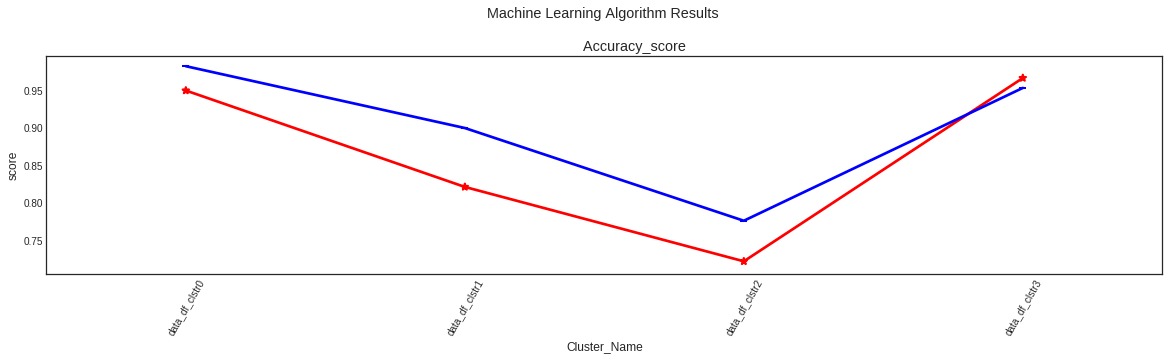

In [0]:
plt.figure(figsize=(20,4))
sns.pointplot(y=Accuracy_KMeans_SVC['Train_Accuracy'].values, x =Accuracy_KMeans_SVC['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'r',markers=["*"],label = 'accuracy_score')
sns.pointplot(y=Accuracy_KMeans_SVC['Test_Accuracy'].values, x =Accuracy_KMeans_SVC['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'b',markers=["_"],label = 'accuracy_score')
plt.title('Machine Learning Algorithm Results \n\n               Accuracy_score')
plt.xlabel('Cluster_Name')
plt.ylabel('score')
plt.xticks(rotation=60)


In [0]:
########## It may be poosible instead of 4 clusers, 3 clusters would predict best accuracy in case of cluster 2[data_df_clstr1] and cluster 3[data_df_clstr2]

In [0]:
#*****************************************************************************************************************************************************

In [0]:
##########################################################################################################################################

##               MODEL PREPARATION ON THE DIFFERENT DATASETS WITH PCA - BASED ON KMEANS CLUSTERS -SIZE 4

##########################################################################################################################################


In [0]:
###########################################   DATASET - data_df_clstr0 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr0  ######################################
  dataset=data_df_clstr0.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (91, 7)] , data_valid_df[shape - (40, 7)] , data_test_df[shape - (57, 7)] 


In [0]:
data_valid_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  hollows_ratio  class_cd
0                  54.0                     12.0  ...          200.0         1
1                  63.0                     11.0  ...          198.0         1
2                  55.0                      5.0  ...          196.0         0
3                  63.0                     11.0  ...          197.0         1
4                  65.0                      9.0  ...          197.0         1

[5 rows x 7 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
####################################################### APPLYING PCA on TRAIN SET ###################################################################

In [0]:
X_train_clstr_z.shape

(91, 6)

In [0]:
cov_matrix = np.cov(X_train_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01111111 -0.23825113 -0.25340059  0.30932182 -0.00828144 -0.2556315 ]
 [-0.23825113  1.01111111  0.14377516 -0.43134145 -0.12465067  0.36882656]
 [-0.25340059  0.14377516  1.01111111  0.0015389   0.01587166  0.16452352]
 [ 0.30932182 -0.43134145  0.0015389   1.01111111  0.08568103 -0.86248248]
 [-0.00828144 -0.12465067  0.01587166  0.08568103  1.01111111 -0.11902574]
 [-0.2556315   0.36882656  0.16452352 -0.86248248 -0.11902574  1.01111111]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.34154611 -0.08023035 -0.47649001  0.02561896  0.78940618 -0.16139444]
 [-0.4235061   0.07698804 -0.00664115 -0.15569961  0.01034743 -0.8890005 ]
 [-0.17399071 -0.16141656  0.7190312  -0.3560697   0.53144542  0.13208405]
 [ 0.57681662  0.71367509  0.24536538 -0.25603725 -0.05550295 -0.17061839]
 [ 0.12002681  0.03405972  0.41050407  0.86953628  0.12854952 -0.20809034]
 [-0.57148248  0.67163117 -0.16489249  0.16330113  0.27329659  0.30622137]]

 Eigen Values 
%s [2.38283526 0.1218754  1.14956449 0.97910544 0.72579546 0.70749061]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,
       -0.57148248])), (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,
       -0.16489249])), (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,
        0.16330113])), (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,
        0.27329659])), (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,
        0.30622137])), (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,
        0.67163117]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,
       -0.16489249])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.3828352618113677, 1.149564490459483, 0.9791054404821263, 0.7257954632652939, 0.7074906144679111, 0.12187539618048869]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.39277504, 0.5822637 , 0.7436547 , 0.86329132, 0.97991065,
       1.        ])

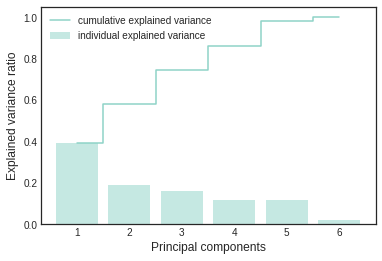

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,
        -0.57148248]),
 array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,
        -0.16489249]),
 array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,
         0.16330113]),
 array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,
         0.27329659]),
 array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,
         0.30622137])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_train_std_5D = np.dot(X_train_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_train_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  0.734180 -1.158299  1.724414 -1.636187 -1.303191
1  1.230572 -0.681957 -1.639066  1.120712 -0.504235
2 -0.383981 -0.397910  0.291504 -0.123979  0.439357
3 -0.830874  0.698501 -1.879747  0.193484 -0.446224
4 -0.573084  1.508747 -0.209116 -0.765439  0.098398

In [0]:
X_train_std_5D.shape

(91, 5)

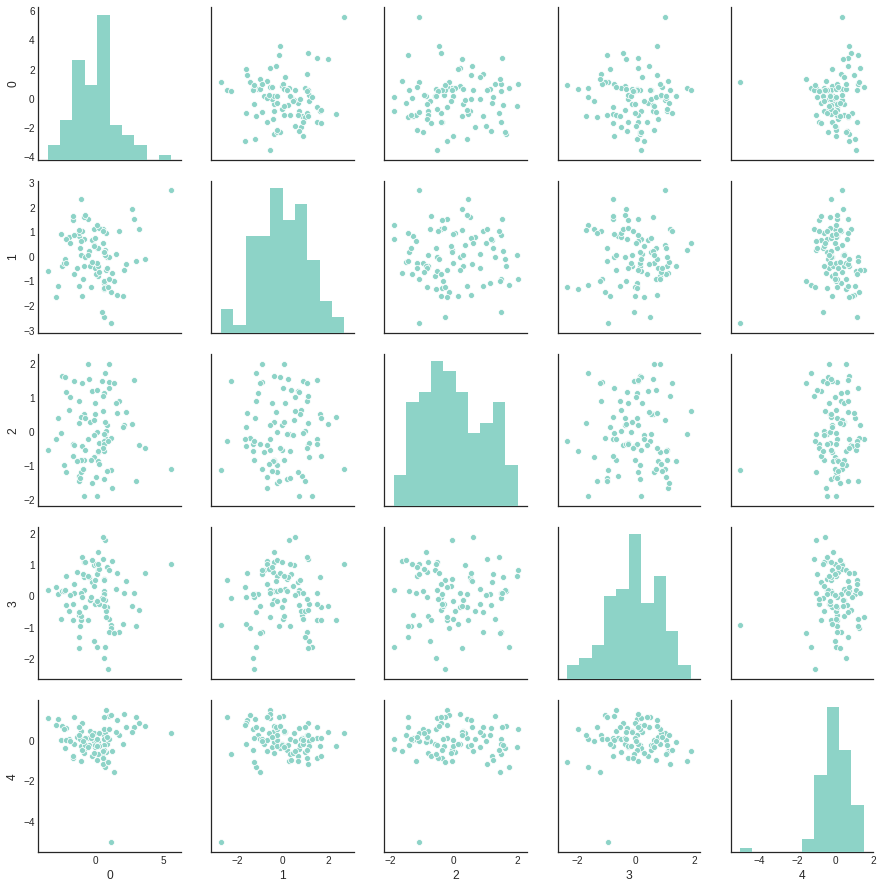

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_std_5D,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
####################################################### APPLYING PCA on VALIDATION SET ###################################################################

In [0]:
X_valid_clstr_z.shape

(40, 6)

In [0]:
cov_matrix = np.cov(X_valid_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.02564103e+00 -2.43212228e-01 -3.80355674e-02  2.13424845e-01
   3.38727062e-01 -2.17096897e-01]
 [-2.43212228e-01  1.02564103e+00  3.13491548e-01 -3.85010078e-01
   1.36347313e-01  4.42241204e-01]
 [-3.80355674e-02  3.13491548e-01  1.02564103e+00  9.20313683e-04
   4.06525978e-01  1.06841447e-01]
 [ 2.13424845e-01 -3.85010078e-01  9.20313683e-04  1.02564103e+00
   3.49485532e-01 -9.12669466e-01]
 [ 3.38727062e-01  1.36347313e-01  4.06525978e-01  3.49485532e-01
   1.02564103e+00 -1.96544830e-01]
 [-2.17096897e-01  4.42241204e-01  1.06841447e-01 -9.12669466e-01
  -1.96544830e-01  1.02564103e+00]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30551096  0.14836512 -0.83506192 -0.04552252 -0.42986309 -0.02163005]
 [ 0.38783117  0.41281799  0.16713972 -0.01027309 -0.42215427 -0.68768658]
 [ 0.06814919  0.63797452  0.22783175  0.02285453 -0.30670009  0.6647177 ]
 [-0.58981143  0.06670624  0.32432274 -0.71571369 -0.1050573  -0.13857989]
 [-0.24321491  0.62677347 -0.15075803  0.13275979  0.67887442 -0.21628197]
 [ 0.58700486  0.05712184 -0.3080834  -0.68368749  0.26651646  0.13706717]]

 Eigen Values 
%s [2.44168907 1.62869939 0.98286513 0.09700299 0.41146874 0.59212084]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.441689073111693, array([-0.30551096,  0.38783117,  0.06814919, -0.58981143, -0.24321491,
        0.58700486])), (1.6286993884576413, array([0.14836512, 0.41281799, 0.63797452, 0.06670624, 0.62677347,
       0.05712184])), (0.9828651265160449, array([-0.83506192,  0.16713972,  0.22783175,  0.32432274, -0.15075803,
       -0.3080834 ])), (0.5921208396150914, array([-0.02163005, -0.68768658,  0.6647177 , -0.13857989, -0.21628197,
        0.13706717])), (0.4114687403891208, array([-0.42986309, -0.42215427, -0.30670009, -0.1050573 ,  0.67887442,
        0.26651646])), (0.09700298575656018, array([-0.04552252, -0.01027309,  0.02285453, -0.71571369,  0.13275979,
       -0.68368749]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([0.14836512, 0.41281799, 0.63797452, 0.06670624, 0.62677347,
       0.05712184])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.441689073111693, 1.6286993884576413, 0.9828651265160449, 0.5921208396150914, 0.4114687403891208, 0.09700298575656018]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.39677447, 0.66143813, 0.82115371, 0.91737334, 0.98423701,
       1.        ])

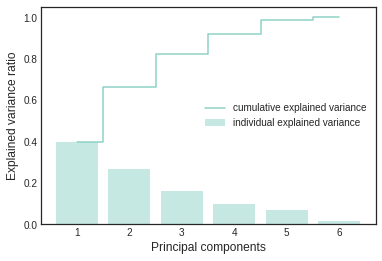

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.30551096,  0.38783117,  0.06814919, -0.58981143, -0.24321491,
         0.58700486]),
 array([0.14836512, 0.41281799, 0.63797452, 0.06670624, 0.62677347,
        0.05712184]),
 array([-0.83506192,  0.16713972,  0.22783175,  0.32432274, -0.15075803,
        -0.3080834 ]),
 array([-0.02163005, -0.68768658,  0.6647177 , -0.13857989, -0.21628197,
         0.13706717]),
 array([-0.42986309, -0.42215427, -0.30670009, -0.1050573 ,  0.67887442,
         0.26651646])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_valid_std_5D = np.dot(X_valid_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_valid_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  2.838510 -0.427480  1.249283 -0.062913 -0.240438
1  0.544864  1.249088  0.350362  0.269688 -0.278724
2 -0.717984 -2.781078  1.325551  1.484812  0.908309
3  0.221705  1.783066  0.077779 -0.226670  0.634509
4  0.670985 -0.953612 -0.563940  0.431055 -0.335347

In [0]:
X_valid_std_5D.shape

(40, 5)

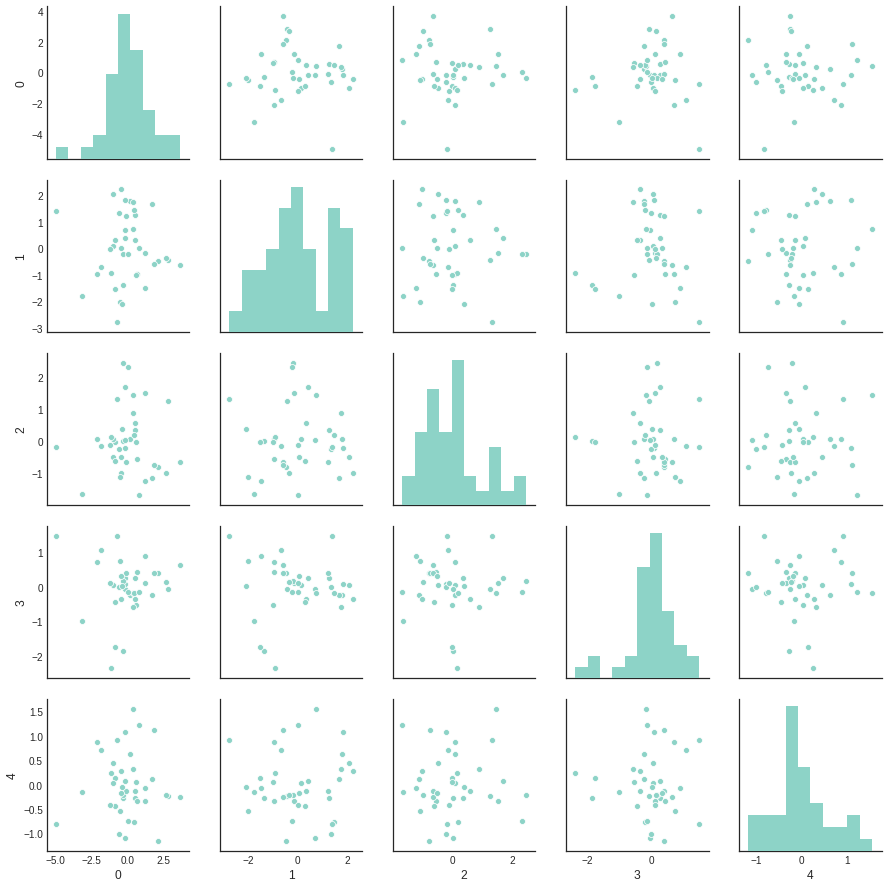

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_std_5D)

Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.65
Confusion Matrix:
 [[ 0  6  0]
 [ 6 25  2]
 [ 0  0  1]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
4         0.901099   {'C': 0.5, 'kernel': 'linear'}
5         0.901099      {'C': 0.5, 'kernel': 'rbf'}
6         0.901099     {'C': 1, 'kernel': 'linear'}
2         0.890110  {'C': 0.05, 'kernel': 'linear'}
7         0.890110        {'C': 1, 'kernel': 'rbf'}
0         0.780220  {'C': 0.01, 'kernel': 'linear'}
1         0.780220     {'C': 0.01, 'kernel': 'rbf'}
3         0.780220     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
####################################################### APPLYING PCA on TEST SET ###################################################################

In [0]:
X_test_clstr_z.shape

(57, 6)

In [0]:
cov_matrix = np.cov(X_test_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01785714 -0.14440766 -0.06457277  0.02779873  0.16802046 -0.09280304]
 [-0.14440766  1.01785714  0.35682178 -0.21501005 -0.01224182  0.22681372]
 [-0.06457277  0.35682178  1.01785714 -0.22994344 -0.08287868  0.29882098]
 [ 0.02779873 -0.21501005 -0.22994344  1.01785714  0.26196787 -0.82590487]
 [ 0.16802046 -0.01224182 -0.08287868  0.26196787  1.01785714 -0.3954879 ]
 [-0.09280304  0.22681372  0.29882098 -0.82590487 -0.3954879   1.01785714]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.1470545   0.02990373 -0.16877502  0.86619155 -0.32884451 -0.30094722]
 [ 0.30624095  0.00718418  0.64375257 -0.00546012  0.14650309 -0.68575106]
 [ 0.34380738 -0.06786805  0.52192975  0.13041738 -0.56174489  0.52174106]
 [-0.55322814  0.66286296  0.22546411 -0.24692421 -0.36319663 -0.10408599]
 [-0.33272121  0.126025    0.42650462  0.39266651  0.62472532  0.38345716]
 [ 0.5912894   0.73428774 -0.22791818  0.13234479  0.18068562  0.09533744]]

 Eigen Values 
%s [2.32744368 0.17523216 1.18129742 1.06310914 0.73438181 0.62567865]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.327443682770937, array([-0.1470545 ,  0.30624095,  0.34380738, -0.55322814, -0.33272121,
        0.5912894 ])), (1.1812974184884164, array([-0.16877502,  0.64375257,  0.52192975,  0.22546411,  0.42650462,
       -0.22791818])), (1.063109144546461, array([ 0.86619155, -0.00546012,  0.13041738, -0.24692421,  0.39266651,
        0.13234479])), (0.7343818086777872, array([-0.32884451,  0.14650309, -0.56174489, -0.36319663,  0.62472532,
        0.18068562])), (0.6256786451088772, array([-0.30094722, -0.68575106,  0.52174106, -0.10408599,  0.38345716,
        0.09533744])), (0.17523215755037927, array([ 0.02990373,  0.00718418, -0.06786805,  0.66286296,  0.126025  ,
        0.73428774]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.16877502,  0.64375257,  0.52192975,  0.22546411,  0.42650462,
       -0.22791818])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.327443682770937, 1.1812974184884164, 1.063109144546461, 0.7343818086777872, 0.6256786451088772, 0.17523215755037927]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.38110189, 0.57453071, 0.74860706, 0.86885671, 0.97130702,
       1.        ])

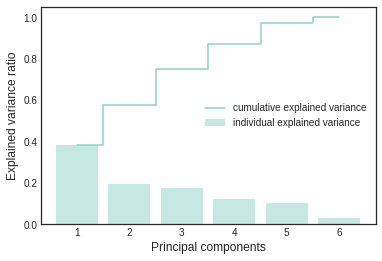

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.1470545 ,  0.30624095,  0.34380738, -0.55322814, -0.33272121,
         0.5912894 ]),
 array([-0.16877502,  0.64375257,  0.52192975,  0.22546411,  0.42650462,
        -0.22791818]),
 array([ 0.86619155, -0.00546012,  0.13041738, -0.24692421,  0.39266651,
         0.13234479]),
 array([-0.32884451,  0.14650309, -0.56174489, -0.36319663,  0.62472532,
         0.18068562]),
 array([-0.30094722, -0.68575106,  0.52174106, -0.10408599,  0.38345716,
         0.09533744])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_test_std_5D = np.dot(X_test_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_test_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  1.903145  0.443110 -1.968419 -0.575988  0.306921
1 -1.563672  2.092903 -0.043796  0.644235  0.547529
2  0.223227 -0.368644  0.530665 -0.287207 -0.240171
3 -0.142299 -0.429686 -0.450730  1.521652 -0.057253
4  0.331250  1.147355  0.059133  0.041569  0.382506

In [0]:
X_test_std_5D.shape

(57, 5)

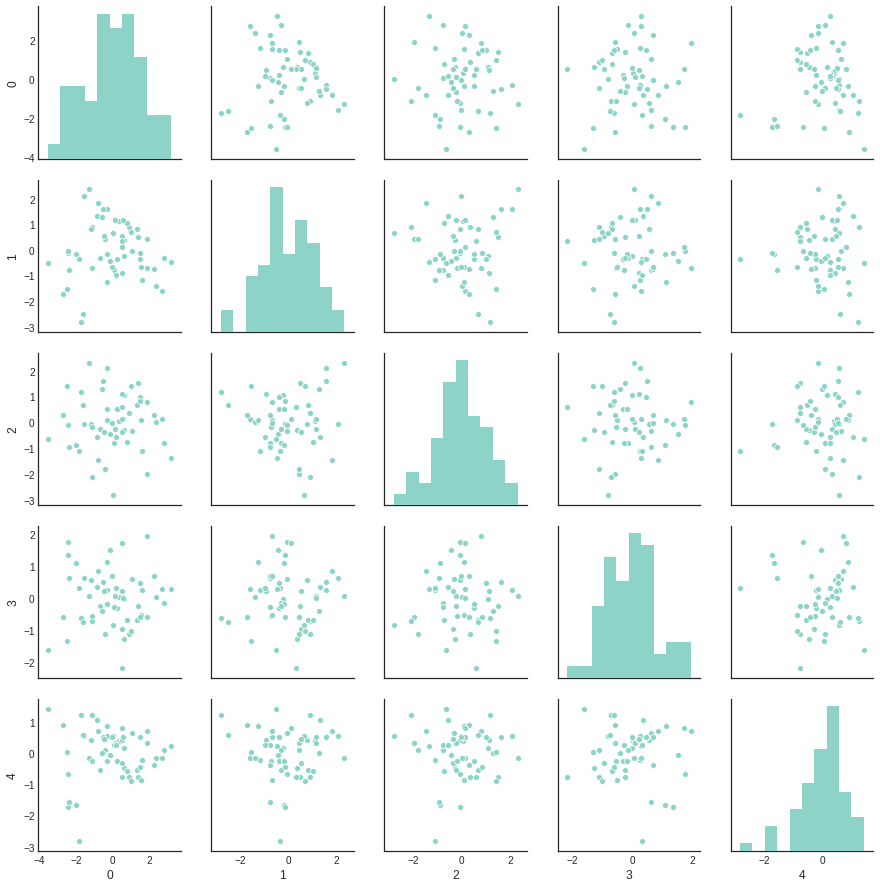

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_std_5D)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.6491228070175439
Confusion Matrix:
 [[ 0 10  2]
 [ 4 37  3]
 [ 1  0  0]]


In [0]:
Accuracy_KMeans_SVC.loc[4,'Cluster_Name']='data_df_clstr0'
Accuracy_KMeans_SVC.loc[4,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[4,'PCA_Applied']='Y'

Accuracy_KMeans_SVC.loc[4,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[4,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC           0.95      0.982456          No
1  data_df_clstr1  model_SVC       0.821429           0.9          No
2  data_df_clstr2  model_SVC       0.722222      0.776316          No
3  data_df_clstr3  model_SVC       0.966667      0.953488          No
4  data_df_clstr0  model_SVC           0.65      0.649123           Y

In [0]:
###########################################   DATASET - data_df_clstr1 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr1  ######################################
  dataset=data_df_clstr1.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (128, 7)] , data_valid_df[shape - (56, 7)] , data_test_df[shape - (80, 7)] 


In [0]:
data_valid_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  hollows_ratio  class_cd
0                  59.0                      7.0  ...          208.0         2
1                  73.0                      6.0  ...          197.0         0
2                  62.0                     11.0  ...          204.0         1
3                  59.0                      6.0  ...          206.0         2
4                  64.0                      8.0  ...          209.0         2

[5 rows x 7 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
####################################################### APPLYING PCA on TRAIN SET ###################################################################

In [0]:
X_train_clstr_z.shape

(128, 6)

In [0]:
cov_matrix = np.cov(X_train_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00787402 -0.23617731  0.36361284  0.32778863 -0.01492184  0.0599767 ]
 [-0.23617731  1.00787402  0.12856542 -0.06732231 -0.14602988  0.00627892]
 [ 0.36361284  0.12856542  1.00787402  0.10709562 -0.05211533  0.02980252]
 [ 0.32778863 -0.06732231  0.10709562  1.00787402 -0.24458774 -0.80139897]
 [-0.01492184 -0.14602988 -0.05211533 -0.24458774  1.00787402  0.1777499 ]
 [ 0.0599767   0.00627892  0.02980252 -0.80139897  0.1777499   1.00787402]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.27364683 -0.32037864  0.57445472  0.14854279 -0.68538126 -0.02577368]
 [-0.05237385 -0.03228687  0.49670646 -0.35407105  0.30637626  0.72819263]
 [ 0.16818848  0.03344051 -0.59800101 -0.26879623 -0.52722977  0.51260757]
 [ 0.67867538  0.69797765  0.15220585 -0.12463417  0.04922509 -0.10537324]
 [-0.28597532  0.05587017  0.11887394 -0.82835025 -0.20454996 -0.41588556]
 [-0.59304711  0.63631953  0.16846848  0.2803917  -0.33786252  0.14913204]]

 Eigen Values 
%s [1.97512569 0.11547798 0.52649591 0.83425131 1.39472852 1.20116469]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(1.9751256933112888, array([ 0.27364683, -0.05237385,  0.16818848,  0.67867538, -0.28597532,
       -0.59304711])), (1.3947285157774127, array([-0.68538126,  0.30637626, -0.52722977,  0.04922509, -0.20454996,
       -0.33786252])), (1.2011646868199182, array([-0.02577368,  0.72819263,  0.51260757, -0.10537324, -0.41588556,
        0.14913204])), (0.8342513080226336, array([ 0.14854279, -0.35407105, -0.26879623, -0.12463417, -0.82835025,
        0.2803917 ])), (0.5264959098790515, array([ 0.57445472,  0.49670646, -0.59800101,  0.15220585,  0.11887394,
        0.16846848])), (0.11547798067788463, array([-0.32037864, -0.03228687,  0.03344051,  0.69797765,  0.05587017,
        0.63631953]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.68538126,  0.30637626, -0.52722977,  0.04922509, -0.20454996,
       -0.33786252])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[1.9751256933112888, 1.3947285157774127, 1.2011646868199182, 0.8342513080226336, 0.5264959098790515, 0.11547798067788463]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.32661584, 0.55725454, 0.75588464, 0.89384026, 0.98090403,
       1.        ])

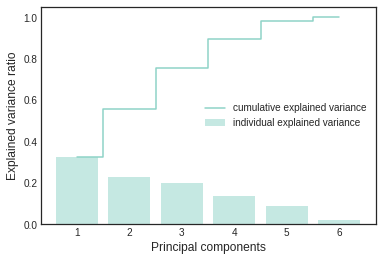

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.27364683, -0.05237385,  0.16818848,  0.67867538, -0.28597532,
        -0.59304711]),
 array([-0.68538126,  0.30637626, -0.52722977,  0.04922509, -0.20454996,
        -0.33786252]),
 array([-0.02577368,  0.72819263,  0.51260757, -0.10537324, -0.41588556,
         0.14913204]),
 array([ 0.14854279, -0.35407105, -0.26879623, -0.12463417, -0.82835025,
         0.2803917 ]),
 array([ 0.57445472,  0.49670646, -0.59800101,  0.15220585,  0.11887394,
         0.16846848])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_train_std_5D = np.dot(X_train_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_train_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -2.219804  0.681638 -1.459282 -0.530739  0.230901
1 -0.883708  1.297980 -2.312671 -0.393017 -0.190596
2  2.101222  1.554872  0.424814  0.296313 -0.496499
3 -1.800802  0.691996 -0.618768  1.776043  0.707448
4 -0.054971 -0.041115  1.495421  1.073332  0.758991

In [0]:
X_train_std_5D.shape

(128, 5)

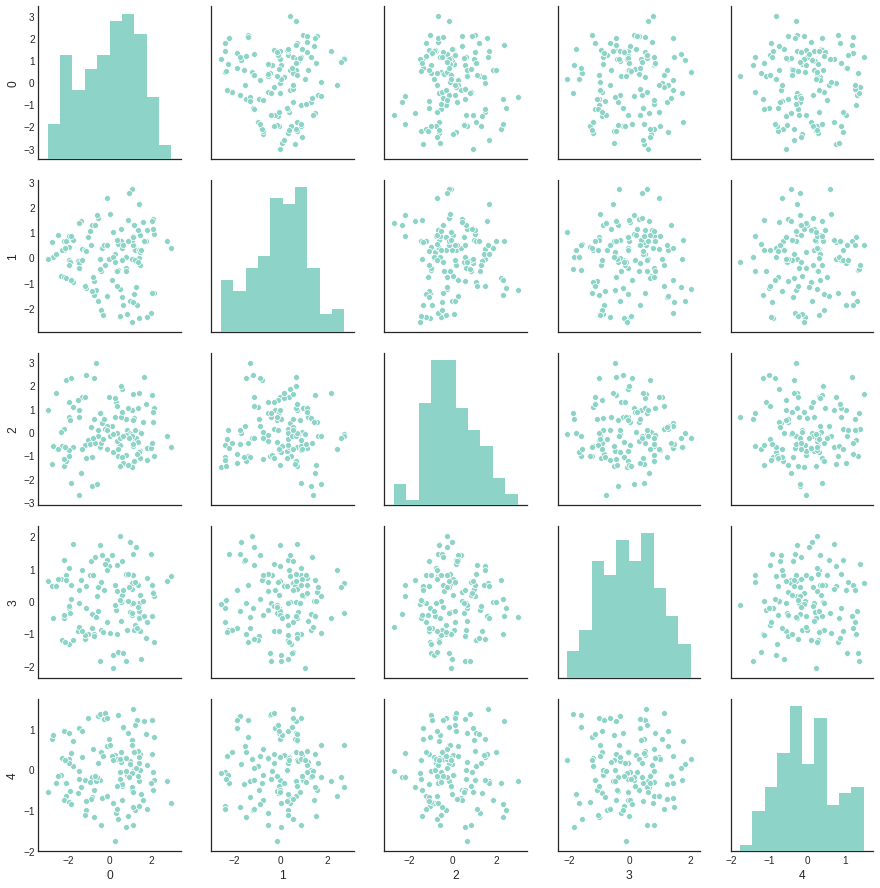

In [0]:

sns.pairplot(Proj_data_df)

In [0]:

#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_std_5D,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
####################################################### APPLYING PCA on VALIDATION SET ###################################################################

In [0]:
X_valid_clstr_z.shape

(56, 6)

In [0]:
cov_matrix = np.cov(X_valid_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01818182 -0.38609824  0.15834229  0.38214073 -0.04381864 -0.08378941]
 [-0.38609824  1.01818182  0.34888449 -0.33325892  0.25995632  0.25027168]
 [ 0.15834229  0.34888449  1.01818182  0.10099138 -0.12941169 -0.00110066]
 [ 0.38214073 -0.33325892  0.10099138  1.01818182 -0.30687339 -0.76877335]
 [-0.04381864  0.25995632 -0.12941169 -0.30687339  1.01818182  0.29061232]
 [-0.08378941  0.25027168 -0.00110066 -0.76877335  0.29061232  1.01818182]]


In [0]:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.3344545   0.28381248  0.41564485  0.79641185  0.01382322  0.0191602 ]
 [ 0.4083884   0.04593776  0.65992243 -0.18607115 -0.54255709  0.25810919]
 [-0.01075785  0.00645498 -0.51987973  0.28137085 -0.796509   -0.12637853]
 [-0.58216787 -0.71624023  0.13661138 -0.06534389 -0.16023277  0.31539413]
 [ 0.34242713 -0.04106349 -0.30653217  0.29576535  0.16964107  0.81904838]
 [ 0.51484716 -0.63451734  0.09403282  0.4002364   0.12869152 -0.38304999]]

 Eigen Values 
%s [2.3337418  0.18857142 0.34607872 1.07459544 1.30113941 0.86496411]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.333741804592636, array([-0.3344545 ,  0.4083884 , -0.01075785, -0.58216787,  0.34242713,
        0.51484716])), (1.301139407554964, array([ 0.01382322, -0.54255709, -0.796509  , -0.16023277,  0.16964107,
        0.12869152])), (1.0745954431146225, array([ 0.79641185, -0.18607115,  0.28137085, -0.06534389,  0.29576535,
        0.4002364 ])), (0.8649641132536235, array([ 0.0191602 ,  0.25810919, -0.12637853,  0.31539413,  0.81904838,
       -0.38304999])), (0.3460787225662537, array([ 0.41564485,  0.65992243, -0.51987973,  0.13661138, -0.30653217,
        0.09403282])), (0.18857141800881083, array([ 0.28381248,  0.04593776,  0.00645498, -0.71624023, -0.04106349,
       -0.63451734]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.01382322, -0.54255709, -0.796509  , -0.16023277,  0.16964107,
        0.12869152])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.333741804592636, 1.301139407554964, 1.0745954431146225, 0.8649641132536235, 0.3460787225662537, 0.18857141800881083]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.38201131, 0.59499544, 0.77089648, 0.91248286, 0.96913265,
       1.        ])

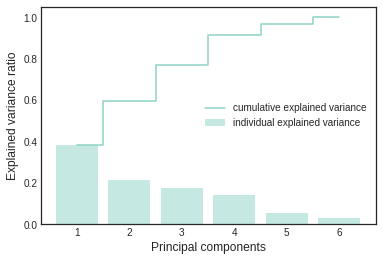

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.3344545 ,  0.4083884 , -0.01075785, -0.58216787,  0.34242713,
         0.51484716]),
 array([ 0.01382322, -0.54255709, -0.796509  , -0.16023277,  0.16964107,
         0.12869152]),
 array([ 0.79641185, -0.18607115,  0.28137085, -0.06534389,  0.29576535,
         0.4002364 ]),
 array([ 0.0191602 ,  0.25810919, -0.12637853,  0.31539413,  0.81904838,
        -0.38304999]),
 array([ 0.41564485,  0.65992243, -0.51987973,  0.13661138, -0.30653217,
         0.09403282])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_valid_std_5D = np.dot(X_valid_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_valid_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  1.968198  2.145767 -0.334701  0.004548 -0.046634
1 -2.819837 -0.102748  1.157963 -0.368973  0.685271
2  1.753823 -2.095318  0.021690 -0.245940  0.420627
3  1.144405  2.027814 -0.623847 -0.901767 -0.297801
4  1.409565  1.036647  0.418883 -0.776406  0.817578

In [0]:
X_valid_std_5D.shape

(56, 5)

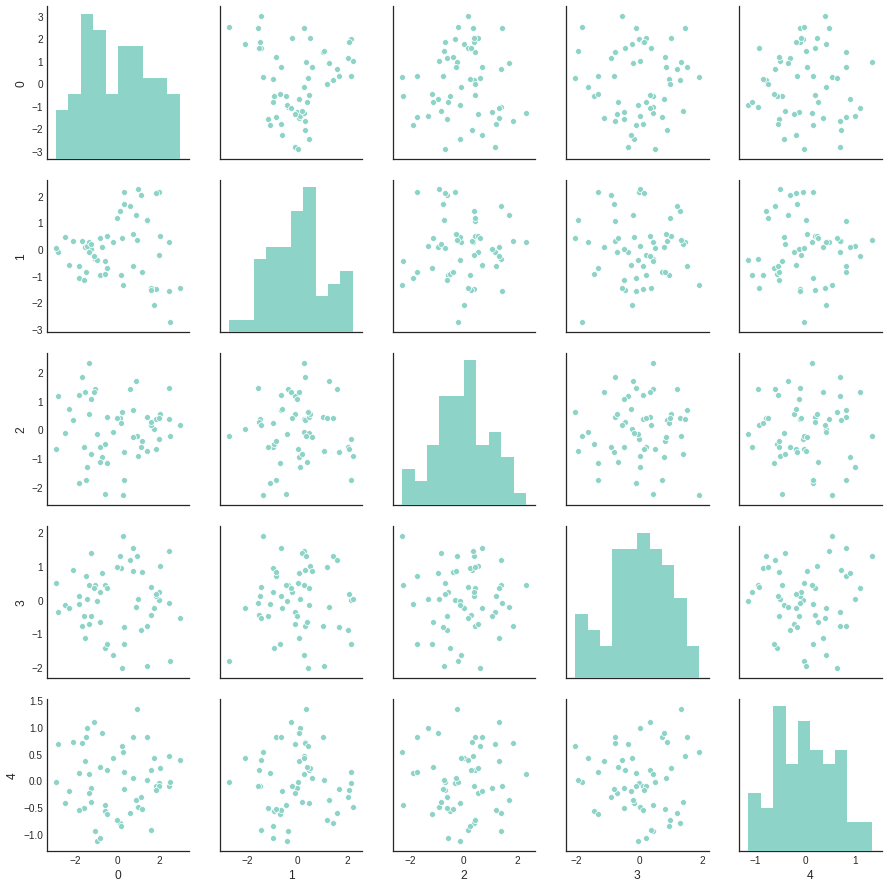

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_std_5D)

Best Hyper Parameters:
 {'C': 0.05, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.30357142857142855
Confusion Matrix:
 [[ 0 11  4]
 [10  6  0]
 [13  1 11]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
2         0.937500  {'C': 0.05, 'kernel': 'linear'}
6         0.929688     {'C': 1, 'kernel': 'linear'}
7         0.921875        {'C': 1, 'kernel': 'rbf'}
4         0.898438   {'C': 0.5, 'kernel': 'linear'}
5         0.875000      {'C': 0.5, 'kernel': 'rbf'}
0         0.781250  {'C': 0.01, 'kernel': 'linear'}
1         0.375000     {'C': 0.01, 'kernel': 'rbf'}
3         0.375000     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
X_test_clstr_z.shape

(80, 6)

In [0]:
cov_matrix = np.cov(X_test_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01265823e+00 -1.68750557e-01  2.59588877e-01  2.16047687e-01
   2.44532312e-01  2.36993547e-02]
 [-1.68750557e-01  1.01265823e+00  1.29053285e-01 -7.81518123e-02
  -8.34640069e-02  1.83772750e-01]
 [ 2.59588877e-01  1.29053285e-01  1.01265823e+00  1.28055431e-17
  -1.86949664e-01  1.37110263e-01]
 [ 2.16047687e-01 -7.81518123e-02  1.28055431e-17  1.01265823e+00
   1.11239425e-01 -7.71662569e-01]
 [ 2.44532312e-01 -8.34640069e-02 -1.86949664e-01  1.11239425e-01
   1.01265823e+00  7.00474251e-03]
 [ 2.36993547e-02  1.83772750e-01  1.37110263e-01 -7.71662569e-01
   7.00474251e-03  1.01265823e+00]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.11339689e-01  1.90180419e-01  6.02226026e-01  2.43388783e-02
  -7.44861599e-01  3.28568789e-02]
 [ 2.65314417e-01  1.25283507e-01  2.43642190e-01 -8.35606316e-01
   1.09636442e-01 -3.79858817e-01]
 [ 1.14877726e-01  4.93144278e-02 -5.81435962e-01  8.50658896e-02
  -5.14315064e-01 -6.12002637e-01]
 [-6.55717061e-01 -6.87272541e-01  2.96640417e-02 -1.87803908e-01
   1.75013896e-02 -2.47457124e-01]
 [-1.85286605e-01  6.59514440e-02 -4.79775483e-01 -5.08589178e-01
  -3.08003880e-01  6.14496074e-01]
 [ 6.38318818e-01 -6.84843340e-01  9.39683472e-02 -4.87203349e-04
  -2.71050502e-01  2.03076400e-01]]

 Eigen Values 
%s [1.89653361 0.18751064 0.51328786 0.93617795 1.32140172 1.2210376 ]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(1.896533609245942, array([-0.21133969,  0.26531442,  0.11487773, -0.65571706, -0.18528661,
        0.63831882])), (1.3214017163330258, array([-0.7448616 ,  0.10963644, -0.51431506,  0.01750139, -0.30800388,
       -0.2710505 ])), (1.2210375972983272, array([ 0.03285688, -0.37985882, -0.61200264, -0.24745712,  0.61449607,
        0.2030764 ])), (0.9361779479238885, array([ 2.43388783e-02, -8.35606316e-01,  8.50658896e-02, -1.87803908e-01,
       -5.08589178e-01, -4.87203349e-04])), (0.5132878553014925, array([ 0.60222603,  0.24364219, -0.58143596,  0.02966404, -0.47977548,
        0.09396835])), (0.18751064098593306, array([ 0.19018042,  0.12528351,  0.04931443, -0.68727254,  0.06595144,
       -0.68484334]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.7448616 ,  0.10963644, -0.51431506,  0.01750139, -0.30800388,
       -0.2710505 ])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[1.896533609245942, 1.3214017163330258, 1.2210375972983272, 0.9361779479238885, 0.5132878553014925, 0.18751064098593306]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.31213782, 0.52961852, 0.73058096, 0.88466025, 0.96913887,
       1.        ])

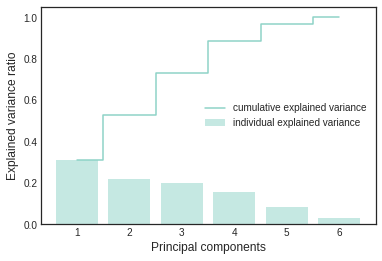

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.21133969,  0.26531442,  0.11487773, -0.65571706, -0.18528661,
         0.63831882]),
 array([-0.7448616 ,  0.10963644, -0.51431506,  0.01750139, -0.30800388,
        -0.2710505 ]),
 array([ 0.03285688, -0.37985882, -0.61200264, -0.24745712,  0.61449607,
         0.2030764 ]),
 array([ 2.43388783e-02, -8.35606316e-01,  8.50658896e-02, -1.87803908e-01,
        -5.08589178e-01, -4.87203349e-04]),
 array([ 0.60222603,  0.24364219, -0.58143596,  0.02966404, -0.47977548,
         0.09396835])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_test_std_5D = np.dot(X_test_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_test_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  0.598626 -0.534556 -0.569253 -0.595141 -0.020392
1  2.087092  0.307216  1.904816 -0.325476  0.137781
2 -1.803087  2.204819  2.415241  0.773953 -0.827107
3 -0.982113  0.637298 -0.229335 -2.358237 -1.012737
4 -1.002776  1.173978 -0.848292  1.076712  0.411862

In [0]:
X_test_std_5D.shape

(80, 5)

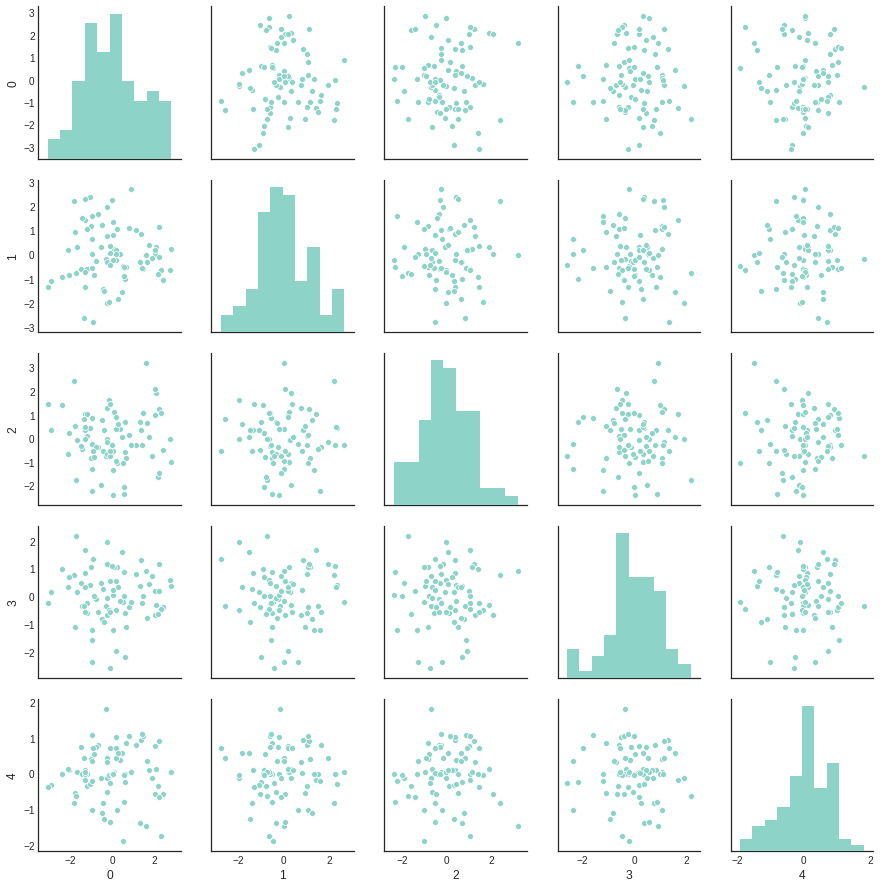

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_std_5D)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.475
Confusion Matrix:
 [[ 6 11  2]
 [10 11  7]
 [ 1 11 21]]


In [0]:
Accuracy_KMeans_SVC.loc[5,'Cluster_Name']='data_df_clstr1'
Accuracy_KMeans_SVC.loc[5,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[5,'PCA_Applied']='Y'
Accuracy_KMeans_SVC.loc[5,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[5,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC           0.95      0.982456          No
1  data_df_clstr1  model_SVC       0.821429           0.9          No
2  data_df_clstr2  model_SVC       0.722222      0.776316          No
3  data_df_clstr3  model_SVC       0.966667      0.953488          No
4  data_df_clstr0  model_SVC           0.65      0.649123           Y
5  data_df_clstr1  model_SVC       0.303571         0.475           Y

In [0]:
###########################################   DATASET - data_df_clstr2 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr2  ######################################
  dataset=data_df_clstr2.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (123, 7)] , data_valid_df[shape - (54, 7)] , data_test_df[shape - (76, 7)] 


In [0]:
data_valid_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  hollows_ratio  class_cd
0                  49.0                      7.0  ...          186.0         0
1                  51.0                      6.0  ...          182.0         0
2                  56.0                      7.0  ...          191.0         1
3                  59.0                      8.0  ...          188.0         1
4                  58.0                      6.0  ...          188.0         2

[5 rows x 7 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
####################################################### APPLYING PCA on TRAIN SET ###################################################################

In [0]:
X_train_clstr_z.shape

(123, 6)

In [0]:
cov_matrix = np.cov(X_train_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00819672 -0.00130005 -0.03798332 -0.19902717 -0.01467326  0.23629741]
 [-0.00130005  1.00819672  0.10542319 -0.24613205 -0.16318863  0.48102891]
 [-0.03798332  0.10542319  1.00819672  0.13554226 -0.1507263   0.03648203]
 [-0.19902717 -0.24613205  0.13554226  1.00819672 -0.06086846 -0.67137791]
 [-0.01467326 -0.16318863 -0.1507263  -0.06086846  1.00819672 -0.03367353]
 [ 0.23629741  0.48102891  0.03648203 -0.67137791 -0.03367353  1.00819672]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.25742461  0.08820175 -0.22866331 -0.3439515   0.86329211  0.10045005]
 [-0.44324041  0.27830166  0.37585026 -0.68660208 -0.3238744  -0.09222611]
 [ 0.00770538  0.11012185  0.62027256  0.20856826  0.15324334  0.73218271]
 [ 0.56995294 -0.58517373  0.25017615 -0.51140497  0.09267649 -0.00364378]
 [ 0.0599937   0.00337392 -0.59924137 -0.29572927 -0.33592138  0.66105989]
 [-0.63934774 -0.74846653  0.0057698   0.13335437 -0.07011762  0.09109975]]

 Eigen Values 
%s [2.03804806 0.27137077 1.28670348 0.62847868 0.96709322 0.85748613]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.0380480608204063, array([-0.25742461, -0.44324041,  0.00770538,  0.56995294,  0.0599937 ,
       -0.63934774])), (1.2867034760696452, array([-0.22866331,  0.37585026,  0.62027256,  0.25017615, -0.59924137,
        0.0057698 ])), (0.9670932186664729, array([ 0.86329211, -0.3238744 ,  0.15324334,  0.09267649, -0.33592138,
       -0.07011762])), (0.8574861281076916, array([ 0.10045005, -0.09222611,  0.73218271, -0.00364378,  0.66105989,
        0.09109975])), (0.628478678849475, array([-0.3439515 , -0.68660208,  0.20856826, -0.51140497, -0.29572927,
        0.13335437])), (0.27137076535515664, array([ 0.08820175,  0.27830166,  0.11012185, -0.58517373,  0.00337392,
       -0.74846653]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.22866331,  0.37585026,  0.62027256,  0.25017615, -0.59924137,
        0.0057698 ])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.0380480608204063, 1.2867034760696452, 0.9670932186664729, 0.8574861281076916, 0.628478678849475, 0.27137076535515664]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.33691309, 0.54962017, 0.70949195, 0.8512444 , 0.95513925,
       1.        ])

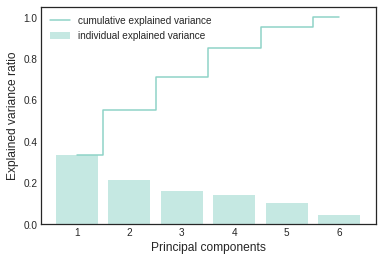

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.25742461, -0.44324041,  0.00770538,  0.56995294,  0.0599937 ,
        -0.63934774]),
 array([-0.22866331,  0.37585026,  0.62027256,  0.25017615, -0.59924137,
         0.0057698 ]),
 array([ 0.86329211, -0.3238744 ,  0.15324334,  0.09267649, -0.33592138,
        -0.07011762]),
 array([ 0.10045005, -0.09222611,  0.73218271, -0.00364378,  0.66105989,
         0.09109975]),
 array([-0.3439515 , -0.68660208,  0.20856826, -0.51140497, -0.29572927,
         0.13335437])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_train_std_5D = np.dot(X_train_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_train_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  0.940323  2.115509  1.671245  1.452644  1.747057
1 -0.403104 -2.428780 -0.374188  0.653703  0.469989
2 -1.010144 -1.441516 -0.438927  1.573004 -0.291612
3  1.644846 -0.066795 -1.020643  0.352546 -0.764212
4  0.839962 -2.027954  0.423970  1.177027 -1.362242

In [0]:
X_train_std_5D.shape

(123, 5)

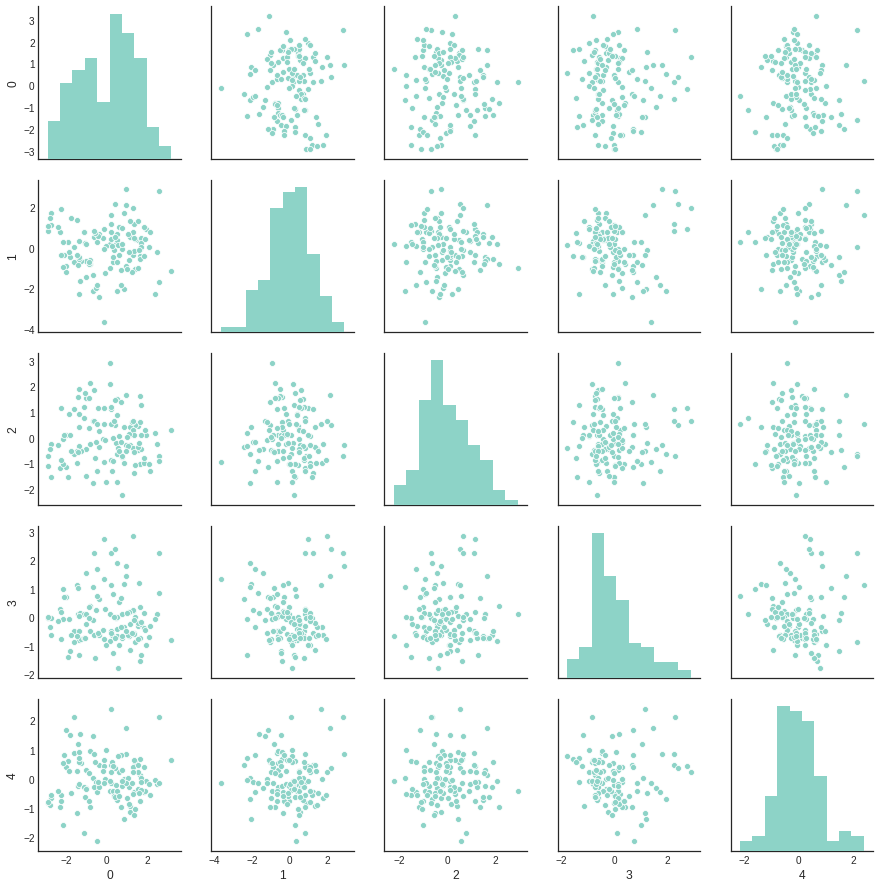

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_std_5D,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
####################################################### APPLYING PCA on VALIDATION SET ###################################################################

In [0]:
X_valid_clstr_z.shape

(54, 6)

In [0]:
cov_matrix = np.cov(X_valid_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01886792  0.08961452 -0.26474203 -0.12719916 -0.17533218  0.24034805]
 [ 0.08961452  1.01886792  0.02825754 -0.4193437  -0.19391452  0.57792044]
 [-0.26474203  0.02825754  1.01886792  0.18662486  0.18350394 -0.10249194]
 [-0.12719916 -0.4193437   0.18662486  1.01886792  0.08879845 -0.78014231]
 [-0.17533218 -0.19391452  0.18350394  0.08879845  1.01886792 -0.07913984]
 [ 0.24034805  0.57792044 -0.10249194 -0.78014231 -0.07913984  1.01886792]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.25042032  0.52636535 -0.13660673  0.20048059  0.77483306  0.03176556]
 [ 0.46493712 -0.26230166 -0.21723899 -0.35473347  0.1112436  -0.72775516]
 [-0.18723887 -0.62297014 -0.06667668 -0.35517313  0.5482071   0.38173952]
 [-0.54884143  0.16857883  0.60226407 -0.22123365  0.24456795 -0.44595342]
 [-0.19605038 -0.44224682 -0.05831411  0.79922313  0.15957754 -0.31362215]
 [ 0.58855932 -0.20504754  0.75071799  0.14185134  0.03806705  0.16249623]]

 Eigen Values 
%s [2.36412739 1.30048711 0.19727725 0.94077998 0.77997389 0.53056192]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.364127387164216, array([ 0.25042032,  0.46493712, -0.18723887, -0.54884143, -0.19605038,
        0.58855932])), (1.300487108554867, array([ 0.52636535, -0.26230166, -0.62297014,  0.16857883, -0.44224682,
       -0.20504754])), (0.94077997845378, array([ 0.20048059, -0.35473347, -0.35517313, -0.22123365,  0.79922313,
        0.14185134])), (0.7799738942658502, array([0.77483306, 0.1112436 , 0.5482071 , 0.24456795, 0.15957754,
       0.03806705])), (0.5305619246974733, array([ 0.03176556, -0.72775516,  0.38173952, -0.44595342, -0.31362215,
        0.16249623])), (0.1972772540336222, array([-0.13660673, -0.21723899, -0.06667668,  0.60226407, -0.05831411,
        0.75071799]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.52636535, -0.26230166, -0.62297014,  0.16857883, -0.44224682,
       -0.20504754])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.364127387164216, 1.300487108554867, 0.94077997845378, 0.7799738942658502, 0.5305619246974733, 0.1972772540336222]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.38672454, 0.59945854, 0.75335157, 0.88093989, 0.96772934,
       1.        ])

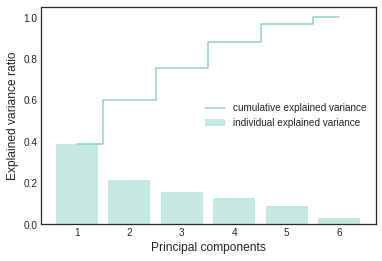

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.25042032,  0.46493712, -0.18723887, -0.54884143, -0.19605038,
         0.58855932]),
 array([ 0.52636535, -0.26230166, -0.62297014,  0.16857883, -0.44224682,
        -0.20504754]),
 array([ 0.20048059, -0.35473347, -0.35517313, -0.22123365,  0.79922313,
         0.14185134]),
 array([0.77483306, 0.1112436 , 0.5482071 , 0.24456795, 0.15957754,
        0.03806705]),
 array([ 0.03176556, -0.72775516,  0.38173952, -0.44595342, -0.31362215,
         0.16249623])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_valid_std_5D = np.dot(X_valid_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_valid_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -1.412125 -2.692075 -1.873651  0.694937  0.847745
1 -1.880139 -0.805896 -0.060213 -0.390158 -0.248479
2  2.077686  0.244706  0.080284 -0.953139  0.925600
3  1.374286  0.810210 -0.601258 -0.044185  0.049824
4  1.170939  0.934641 -0.344655 -0.481913  1.177170

In [0]:
X_valid_std_5D.shape

(54, 5)

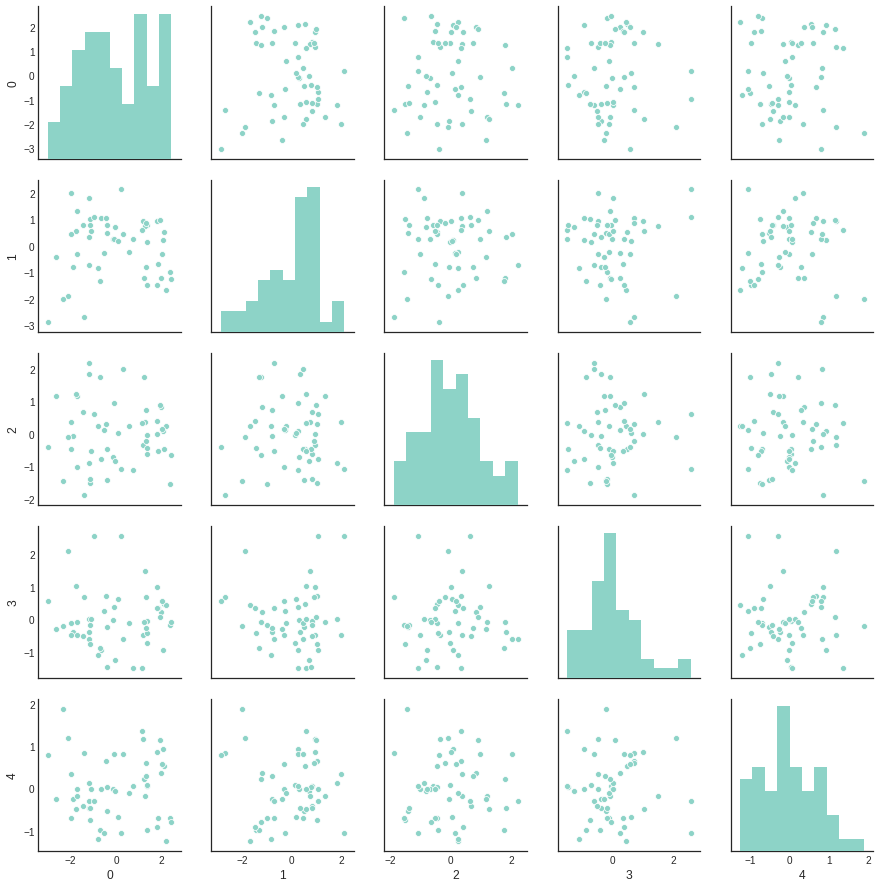

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_std_5D)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.4074074074074074
Confusion Matrix:
 [[11 11  5]
 [ 5  4  5]
 [ 4  2  7]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
6         0.829268     {'C': 1, 'kernel': 'linear'}
5         0.821138      {'C': 0.5, 'kernel': 'rbf'}
7         0.813008        {'C': 1, 'kernel': 'rbf'}
4         0.804878   {'C': 0.5, 'kernel': 'linear'}
2         0.788618  {'C': 0.05, 'kernel': 'linear'}
0         0.552846  {'C': 0.01, 'kernel': 'linear'}
1         0.487805     {'C': 0.01, 'kernel': 'rbf'}
3         0.487805     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
X_test_clstr_z.shape

(76, 6)

In [0]:
cov_matrix = np.cov(X_test_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01333333 -0.04075286  0.18095764 -0.21701548 -0.1825433   0.27722678]
 [-0.04075286  1.01333333 -0.00230202 -0.40118759 -0.02218449  0.46451962]
 [ 0.18095764 -0.00230202  1.01333333  0.15588046 -0.03510969 -0.09956761]
 [-0.21701548 -0.40118759  0.15588046  1.01333333  0.00147025 -0.84535618]
 [-0.1825433  -0.02218449 -0.03510969  0.00147025  1.01333333  0.04552102]
 [ 0.27722678  0.46451962 -0.09956761 -0.84535618  0.04552102  1.01333333]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.19806432e-01  8.21233352e-02  5.38037388e-01 -6.61147185e-01
   4.67269461e-01 -5.55990915e-04]
 [-4.22374589e-01  9.23048505e-02  5.75939864e-01  1.54232560e-01
  -6.59671922e-01  1.49726640e-01]
 [ 9.46239417e-02  2.10639141e-02 -3.41187103e-01 -5.35255937e-01
  -3.22845486e-01  6.95317090e-01]
 [ 6.09942329e-01 -6.64729222e-01  4.06629716e-01 -4.65221124e-02
  -1.30242790e-01  4.03757273e-02]
 [ 1.48751313e-02  6.09448469e-02  2.12527432e-01  5.00244890e-01
   4.60208104e-01  6.99185310e-01]
 [-6.26163105e-01 -7.33970483e-01 -2.27782282e-01  1.37310320e-02
   1.16225273e-01  6.02118908e-02]]

 Eigen Values 
%s [2.26141131 0.15736683 0.50147418 1.28643106 0.89549922 0.9778174 ]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.2614113114055368, array([-0.21980643, -0.42237459,  0.09462394,  0.60994233,  0.01487513,
       -0.62616311])), (1.2864310594422996, array([-0.66114719,  0.15423256, -0.53525594, -0.04652211,  0.50024489,
        0.01373103])), (0.9778174014433818, array([-5.55990915e-04,  1.49726640e-01,  6.95317090e-01,  4.03757273e-02,
        6.99185310e-01,  6.02118908e-02])), (0.8954992156558343, array([ 0.46726946, -0.65967192, -0.32284549, -0.13024279,  0.4602081 ,
        0.11622527])), (0.5014741826022903, array([ 0.53803739,  0.57593986, -0.3411871 ,  0.40662972,  0.21252743,
       -0.22778228])), (0.15736682945065517, array([ 0.08212334,  0.09230485,  0.02106391, -0.66472922,  0.06094485,
       -0.73397048]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.66114719,  0.15423256, -0.53525594, -0.04652211,  0.50024489,
        0.01373103])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.2614113114055368, 1.2864310594422996, 0.9778174014433818, 0.8954992156558343, 0.5014741826022903, 0.15736682945065517]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.37194265, 0.58352671, 0.74435194, 0.89163799, 0.9741173 ,
       1.        ])

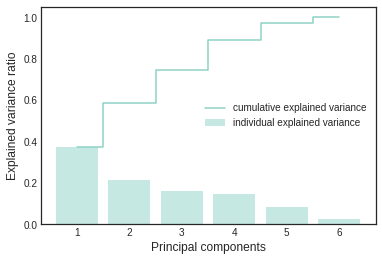

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.21980643, -0.42237459,  0.09462394,  0.60994233,  0.01487513,
        -0.62616311]),
 array([-0.66114719,  0.15423256, -0.53525594, -0.04652211,  0.50024489,
         0.01373103]),
 array([-5.55990915e-04,  1.49726640e-01,  6.95317090e-01,  4.03757273e-02,
         6.99185310e-01,  6.02118908e-02]),
 array([ 0.46726946, -0.65967192, -0.32284549, -0.13024279,  0.4602081 ,
         0.11622527]),
 array([ 0.53803739,  0.57593986, -0.3411871 ,  0.40662972,  0.21252743,
        -0.22778228])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_test_std_5D = np.dot(X_test_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_test_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -0.818484  0.828102  0.465438  0.314643 -0.202081
1  1.331315  0.112628 -1.203502  0.820129 -0.680543
2 -3.466393  0.918226  0.849616 -1.809885  0.786481
3  0.429773  1.688011 -0.150970 -0.379900 -0.282434
4 -1.027318  0.827490  1.044876  0.244857  0.353171

In [0]:
X_test_std_5D.shape

(76, 5)

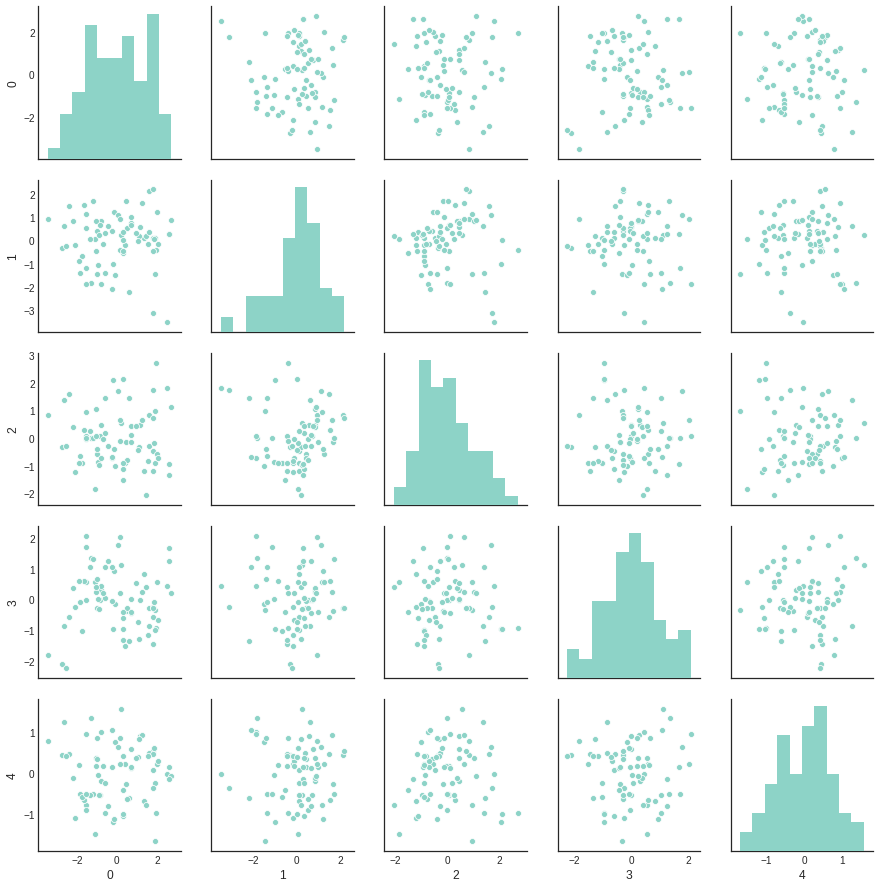

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_std_5D)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.25
Confusion Matrix:
 [[14 12 15]
 [15  1  1]
 [ 5  9  4]]


In [0]:
Accuracy_KMeans_SVC.loc[6,'Cluster_Name']='data_df_clstr2'
Accuracy_KMeans_SVC.loc[6,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[6,'PCA_Applied']='Y'
Accuracy_KMeans_SVC.loc[6,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[6,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC           0.95      0.982456          No
1  data_df_clstr1  model_SVC       0.821429           0.9          No
2  data_df_clstr2  model_SVC       0.722222      0.776316          No
3  data_df_clstr3  model_SVC       0.966667      0.953488          No
4  data_df_clstr0  model_SVC           0.65      0.649123           Y
5  data_df_clstr1  model_SVC       0.303571         0.475           Y
6  data_df_clstr2  model_SVC       0.407407          0.25           Y

In [0]:
###########################################   DATASET - data_df_clstr3 #####################################################################

In [0]:
################################### CREATING TRAIN , VALIDATION and TEST DATASETS ON  data_df_clstr3  ######################################
  dataset=data_df_clstr3.copy(deep=True)
  test_size_limit = 0.30
  X = np.array(dataset[Independent_cols])
  Y= np.array(dataset[Dependent_cols])
  from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV
  X1, X_test, y1, y_test = train_test_split(X, Y,test_size=test_size_limit, random_state=0)
  # Splitting the adult_df_trainValidate into training and validation set
  X_train,X_valid,y_train,y_valid = train_test_split(X1, y1,test_size=test_size_limit, random_state=0)
  data_test_df = Pd.concat([Pd.DataFrame(X_test,columns=Independent_cols),Pd.DataFrame(y_test,columns=Dependent_cols)],axis=1)
  data_train_df = Pd.concat([Pd.DataFrame(X_train,columns=Independent_cols),Pd.DataFrame(y_train,columns=Dependent_cols)],axis=1)
  data_valid_df = Pd.concat([Pd.DataFrame(X_valid,columns=Independent_cols),Pd.DataFrame(y_valid,columns=Dependent_cols)],axis=1)
  print("Datasets created  are :- data_train_df[shape - {}] , data_valid_df[shape - {}] , data_test_df[shape - {}] ".format(data_train_df.shape,data_valid_df.shape,data_test_df.shape))

Datasets created  are :- data_train_df[shape - (68, 7)] , data_valid_df[shape - (30, 7)] , data_test_df[shape - (43, 7)] 


In [0]:
data_valid_df.head()

pr.axis_aspect_ratio  max.length_aspect_ratio  ...  hollows_ratio  class_cd
0                  59.0                      7.0  ...          204.0         2
1                  61.0                     11.0  ...          205.0         1
2                  64.0                     10.0  ...          201.0         1
3                  64.0                     12.0  ...          205.0         1
4                  64.0                     11.0  ...          199.0         1

[5 rows x 7 columns]

In [0]:
################################## Performing the scaling on the independent columns/attributes of Train and Validation Data Separately ##################

In [0]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import zscore

scaler = StandardScaler()

X_train_clstr_z = scaler.fit_transform(np.array(data_train_df[Independent_cols]))
X_valid_clstr_z = scaler.fit_transform(np.array(data_valid_df[Independent_cols]))
X_test_clstr_z = scaler.fit_transform(np.array(data_test_df[Independent_cols]))
##data_test_df_clstr_z_df = Pd.DataFrame(X_train_clstr_z,columns=Independent_cols_clstr)


# data_train_z = data_train.apply(zscore)

In [0]:
####################################################### APPLYING PCA on TRAIN SET ###################################################################

In [0]:
X_train_clstr_z.shape

(68, 6)

In [0]:
cov_matrix = np.cov(X_train_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01492537  0.07821429  0.03246908 -0.07879902 -0.00480188  0.26744029]
 [ 0.07821429  1.01492537  0.74845008  0.36623873  0.03962544 -0.01197044]
 [ 0.03246908  0.74845008  1.01492537  0.39081897 -0.07294433 -0.10388166]
 [-0.07879902  0.36623873  0.39081897  1.01492537 -0.25291635 -0.80708121]
 [-0.00480188  0.03962544 -0.07294433 -0.25291635  1.01492537  0.19429455]
 [ 0.26744029 -0.01197044 -0.10388166 -0.80708121  0.19429455  1.01492537]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.09090483 -0.37498221  0.67987524  0.6109256  -0.10578427  0.06688738]
 [ 0.4281215  -0.53291906 -0.12285817 -0.10484367 -0.28603781 -0.6517709 ]
 [ 0.46831528 -0.45813901 -0.06418363 -0.21582869  0.01844504  0.72093527]
 [ 0.58721934  0.22420102  0.06279911  0.29392858  0.69850846 -0.16326524]
 [-0.19514465 -0.25351487 -0.71395166  0.61304484  0.07123433  0.08380628]
 [-0.45411574 -0.50095746  0.06989487 -0.32707446  0.64316673 -0.13150695]]

 Eigen Values 
%s [2.31401054 1.56690601 1.02298459 0.80412069 0.11827501 0.2632554 ]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.3140105361084684, array([-0.09090483,  0.4281215 ,  0.46831528,  0.58721934, -0.19514465,
       -0.45411574])), (1.5669060149628073, array([-0.37498221, -0.53291906, -0.45813901,  0.22420102, -0.25351487,
       -0.50095746])), (1.022984587579134, array([ 0.67987524, -0.12285817, -0.06418363,  0.06279911, -0.71395166,
        0.06989487])), (0.8041206926050798, array([ 0.6109256 , -0.10484367, -0.21582869,  0.29392858,  0.61304484,
       -0.32707446])), (0.2632554015024064, array([ 0.06688738, -0.6517709 ,  0.72093527, -0.16326524,  0.08380628,
       -0.13150695])), (0.11827500604807807, array([-0.10578427, -0.28603781,  0.01844504,  0.69850846,  0.07123433,
        0.64316673]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([-0.37498221, -0.53291906, -0.45813901,  0.22420102, -0.25351487,
       -0.50095746])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.3140105361084684, 1.5669060149628073, 1.022984587579134, 0.8041206926050798, 0.2632554015024064, 0.11827500604807807]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.37999683, 0.63730737, 0.80529749, 0.93734672, 0.98057739,
       1.        ])

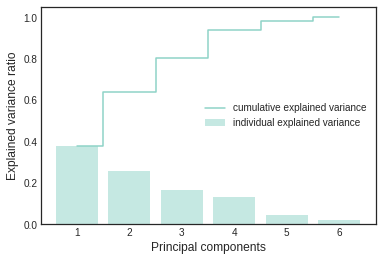

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([-0.09090483,  0.4281215 ,  0.46831528,  0.58721934, -0.19514465,
        -0.45411574]),
 array([-0.37498221, -0.53291906, -0.45813901,  0.22420102, -0.25351487,
        -0.50095746]),
 array([ 0.67987524, -0.12285817, -0.06418363,  0.06279911, -0.71395166,
         0.06989487]),
 array([ 0.6109256 , -0.10484367, -0.21582869,  0.29392858,  0.61304484,
        -0.32707446]),
 array([ 0.06688738, -0.6517709 ,  0.72093527, -0.16326524,  0.08380628,
        -0.13150695])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_train_std_5D = np.dot(X_train_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_train_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -1.402269 -2.866123 -2.186126  0.129291 -0.308841
1  1.929351 -0.493083 -0.369198  0.357723  0.397449
2  0.130978 -2.746880  0.329913  0.240389 -0.027860
3 -0.895717  1.741266  0.750189  1.227495 -0.201566
4 -2.039181  0.962314 -0.507957 -0.997674  0.216262

In [0]:
X_train_std_5D.shape

(68, 5)

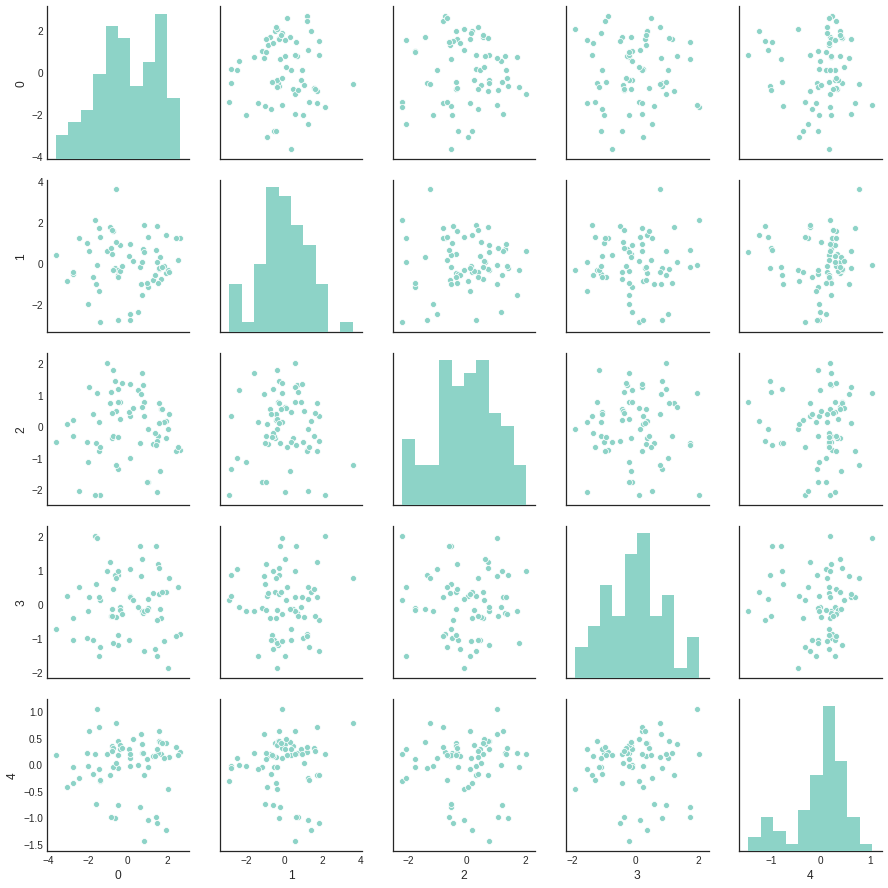

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [0]:
#making the instance
model_SVC=svm.SVC()
#Hyper Parameters Set
params = {'C': [ 0.01, 0.05, 0.5, 1],'kernel': ['linear','rbf']}

In [0]:
################ Crossvalidation KFOLD ##############
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
################################################### VALIDATION DATASET VALIDATION #####################################################

In [0]:
#Making models with hyper parameters sets
model_CV = GridSearchCV(model_SVC, param_grid=params, n_jobs=-1,cv=kfold)
#Learning
model_CV.fit(X_train_std_5D,np.array(data_train_df[Dependent_cols]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
####################################################### APPLYING PCA on VALIDATION SET ###################################################################

In [0]:
X_valid_clstr_z.shape

(30, 6)

In [0]:
cov_matrix = np.cov(X_valid_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.03448276  0.35769995  0.29530685  0.10308713  0.18230948 -0.0026708 ]
 [ 0.35769995  1.03448276  0.7977249   0.14579892  0.31036748  0.18817868]
 [ 0.29530685  0.7977249   1.03448276  0.38109341  0.17403769 -0.15961988]
 [ 0.10308713  0.14579892  0.38109341  1.03448276 -0.06280696 -0.7143395 ]
 [ 0.18230948  0.31036748  0.17403769 -0.06280696  1.03448276  0.45589345]
 [-0.0026708   0.18817868 -0.15961988 -0.7143395   0.45589345  1.03448276]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.37053521  0.09495747  0.9211714  -0.01841604 -0.06905114  0.00477209]
 [ 0.57604165  0.20734476 -0.21667635 -0.31226124  0.59370665  0.35810734]
 [ 0.60237981 -0.04133164 -0.27929216 -0.25128354 -0.5162494  -0.4772518 ]
 [ 0.32469605 -0.52930427 -0.0910281   0.44301216 -0.27819195  0.57660455]
 [ 0.23250289  0.45138748 -0.110981    0.79537671  0.15709134 -0.26939407]
 [-0.0923749   0.67997739 -0.07673068 -0.10063033 -0.52360525  0.48879557]]

 Eigen Values 
%s [2.27604662 1.95987991 0.82888173 0.76076729 0.14707485 0.23424616]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.2760466159000385, array([ 0.37053521,  0.57604165,  0.60237981,  0.32469605,  0.23250289,
       -0.0923749 ])), (1.959879911954815, array([ 0.09495747,  0.20734476, -0.04133164, -0.52930427,  0.45138748,
        0.67997739])), (0.828881727853851, array([ 0.9211714 , -0.21667635, -0.27929216, -0.0910281 , -0.110981  ,
       -0.07673068])), (0.7607672868191205, array([-0.01841604, -0.31226124, -0.25128354,  0.44301216,  0.79537671,
       -0.10063033])), (0.2342461602195526, array([ 0.00477209,  0.35810734, -0.4772518 ,  0.57660455, -0.26939407,
        0.48879557])), (0.14707484897675935, array([-0.06905114,  0.59370665, -0.5162494 , -0.27819195,  0.15709134,
       -0.52360525]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.09495747,  0.20734476, -0.04133164, -0.52930427,  0.45138748,
        0.67997739])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.2760466159000385, 1.959879911954815, 0.828881727853851, 0.7607672868191205, 0.2342461602195526, 0.14707484897675935]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.3666964 , 0.68245483, 0.81599689, 0.93856495, 0.97630461,
       1.        ])

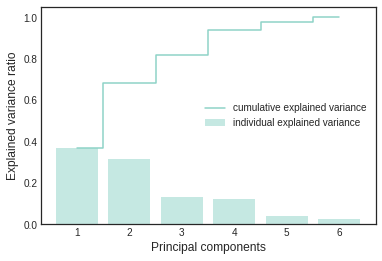

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.37053521,  0.57604165,  0.60237981,  0.32469605,  0.23250289,
        -0.0923749 ]),
 array([ 0.09495747,  0.20734476, -0.04133164, -0.52930427,  0.45138748,
         0.67997739]),
 array([ 0.9211714 , -0.21667635, -0.27929216, -0.0910281 , -0.110981  ,
        -0.07673068]),
 array([-0.01841604, -0.31226124, -0.25128354,  0.44301216,  0.79537671,
        -0.10063033]),
 array([ 0.00477209,  0.35810734, -0.4772518 ,  0.57660455, -0.26939407,
         0.48879557])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_valid_std_5D = np.dot(X_valid_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_valid_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0 -2.688967  1.132374 -0.031808  0.544496  0.294698
1  0.663519  2.695378 -0.926466  0.467464 -0.716578
2 -0.134444  0.385723  0.505290 -0.965477 -0.002580
3  2.539931  1.552674 -0.695923  1.614097  0.748075
4  2.092215  0.490017 -0.351049  1.450896 -0.517433

In [0]:
X_valid_std_5D.shape

(30, 5)

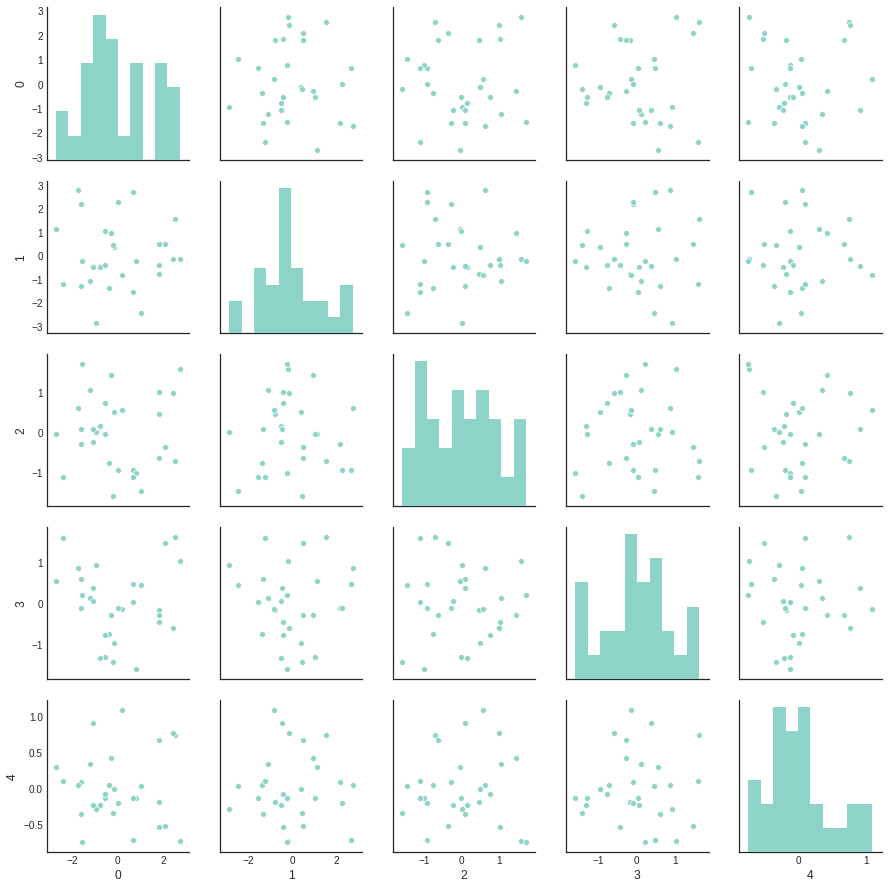

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_CV.best_params_)
#Prediction
prediction_valid=model_CV.predict(X_valid_std_5D)

Best Hyper Parameters:
 {'C': 0.5, 'kernel': 'linear'}


In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_valid:",metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_valid,np.array(data_valid_df[Dependent_cols])))

Accuracy_valid: 0.7
Confusion Matrix:
 [[ 0  0  1]
 [ 0 21  4]
 [ 0  4  0]]


In [0]:
Gridsearch_CV_Results_df  = Pd.DataFrame(list(zip(model_CV.cv_results_['mean_test_score'],model_CV.cv_results_['params'])),columns = ['mean_test_score','params']).sort_values(by='mean_test_score',ascending=False)

Gridsearch_CV_Results_df

mean_test_score                           params
4         0.926471   {'C': 0.5, 'kernel': 'linear'}
6         0.926471     {'C': 1, 'kernel': 'linear'}
7         0.911765        {'C': 1, 'kernel': 'rbf'}
5         0.779412      {'C': 0.5, 'kernel': 'rbf'}
0         0.764706  {'C': 0.01, 'kernel': 'linear'}
1         0.764706     {'C': 0.01, 'kernel': 'rbf'}
2         0.764706  {'C': 0.05, 'kernel': 'linear'}
3         0.764706     {'C': 0.05, 'kernel': 'rbf'}

In [0]:
################################################### TEST DATASET VALIDATION #####################################################

In [0]:
X_test_clstr_z.shape

(43, 6)

In [0]:
cov_matrix = np.cov(X_test_clstr_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.02380952  0.2486292   0.02206725  0.04049146  0.05128119  0.01204858]
 [ 0.2486292   1.02380952  0.79571912  0.16801794  0.018645    0.13162195]
 [ 0.02206725  0.79571912  1.02380952  0.36091814 -0.12473769 -0.05291507]
 [ 0.04049146  0.16801794  0.36091814  1.02380952 -0.08832924 -0.87506033]
 [ 0.05128119  0.018645   -0.12473769 -0.08832924  1.02380952  0.0829422 ]
 [ 0.01204858  0.13162195 -0.05291507 -0.87506033  0.0829422   1.02380952]]


In [0]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.11473354  0.2103791   0.65677442  0.69183302  0.17906178 -0.02298186]
 [ 0.42656266  0.56273404  0.02079971 -0.08129438 -0.70190474 -0.04078042]
 [ 0.52126769  0.40260307 -0.21930851 -0.17985625  0.66585538 -0.20587103]
 [ 0.57731454 -0.37843033  0.10094243 -0.05679352  0.01553377  0.71403238]
 [-0.12213944  0.07581933  0.70146765 -0.692203    0.08851694 -0.01721251]
 [-0.43005858  0.57273355 -0.13368723  0.00628663  0.15435897  0.66729859]]

 Eigen Values 
%s [2.15242576 1.70953351 1.08285649 0.93433419 0.17051535 0.09319184]


In [0]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

[(2.1524257551183683, array([ 0.11473354,  0.42656266,  0.52126769,  0.57731454, -0.12213944,
       -0.43005858])), (1.7095335136677594, array([ 0.2103791 ,  0.56273404,  0.40260307, -0.37843033,  0.07581933,
        0.57273355])), (1.0828564928610371, array([ 0.65677442,  0.02079971, -0.21930851,  0.10094243,  0.70146765,
       -0.13368723])), (0.9343341898213432, array([ 0.69183302, -0.08129438, -0.17985625, -0.05679352, -0.692203  ,
        0.00628663])), (0.1705153472526852, array([ 0.17906178, -0.70190474,  0.66585538,  0.01553377,  0.08851694,
        0.15435897])), (0.09319184413595118, array([-0.02298186, -0.04078042, -0.20587103,  0.71403238, -0.01721251,
        0.66729859]))]


In [0]:
#[(2.3828352618113677, array([ 0.34154611, -0.4235061 , -0.17399071,  0.57681662,  0.12002681,-0.57148248])), 
# (1.149564490459483, array([-0.47649001, -0.00664115,  0.7190312 ,  0.24536538,  0.41050407,-0.16489249])), 
# (0.9791054404821263, array([ 0.02561896, -0.15569961, -0.3560697 , -0.25603725,  0.86953628,0.16330113])), 
# (0.7257954632652939, array([ 0.78940618,  0.01034743,  0.53144542, -0.05550295,  0.12854952,0.27329659])), 
# (0.7074906144679111, array([-0.16139444, -0.8890005 ,  0.13208405, -0.17061839, -0.20809034,0.30622137])),
# (0.12187539618048869, array([-0.08023035,  0.07698804, -0.16141656,  0.71367509,  0.03405972,0.67163117]))]

In [0]:
eig_pairs[1][1]

array([ 0.2103791 ,  0.56273404,  0.40260307, -0.37843033,  0.07581933,
        0.57273355])

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[2.1524257551183683, 1.7095335136677594, 1.0828564928610371, 0.9343341898213432, 0.1705153472526852, 0.09319184413595118]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.35039489, 0.62869104, 0.80497001, 0.95707092, 0.98482923,
       1.        ])

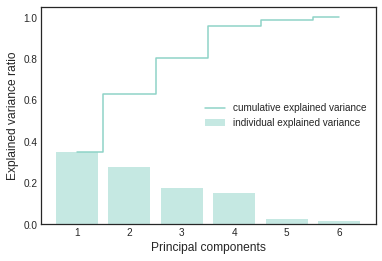

In [0]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [0]:
eigvectors_sorted[0:5]

[array([ 0.11473354,  0.42656266,  0.52126769,  0.57731454, -0.12213944,
        -0.43005858]),
 array([ 0.2103791 ,  0.56273404,  0.40260307, -0.37843033,  0.07581933,
         0.57273355]),
 array([ 0.65677442,  0.02079971, -0.21930851,  0.10094243,  0.70146765,
        -0.13368723]),
 array([ 0.69183302, -0.08129438, -0.17985625, -0.05679352, -0.692203  ,
         0.00628663]),
 array([ 0.17906178, -0.70190474,  0.66585538,  0.01553377,  0.08851694,
         0.15435897])]

In [0]:
## 5 PC componenets explain the varaince around 95.0 %

In [0]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space
X_test_std_5D = np.dot(X_test_clstr_z,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = Pd.DataFrame(X_test_std_5D)  # converting array to dataframe for pairplot
Proj_data_df.head()


0         1         2         3         4
0  0.791346  0.321639 -0.202934  1.379876 -0.158243
1  1.504161  0.643835 -0.301651 -1.159365 -0.039727
2  0.420061 -3.260405  1.433998 -0.515108  0.288191
3  0.405843  2.367861  1.794731 -1.449228 -0.016514
4  0.542905  1.056464 -0.546471 -1.203698 -0.256307

In [0]:
X_test_std_5D.shape

(43, 5)

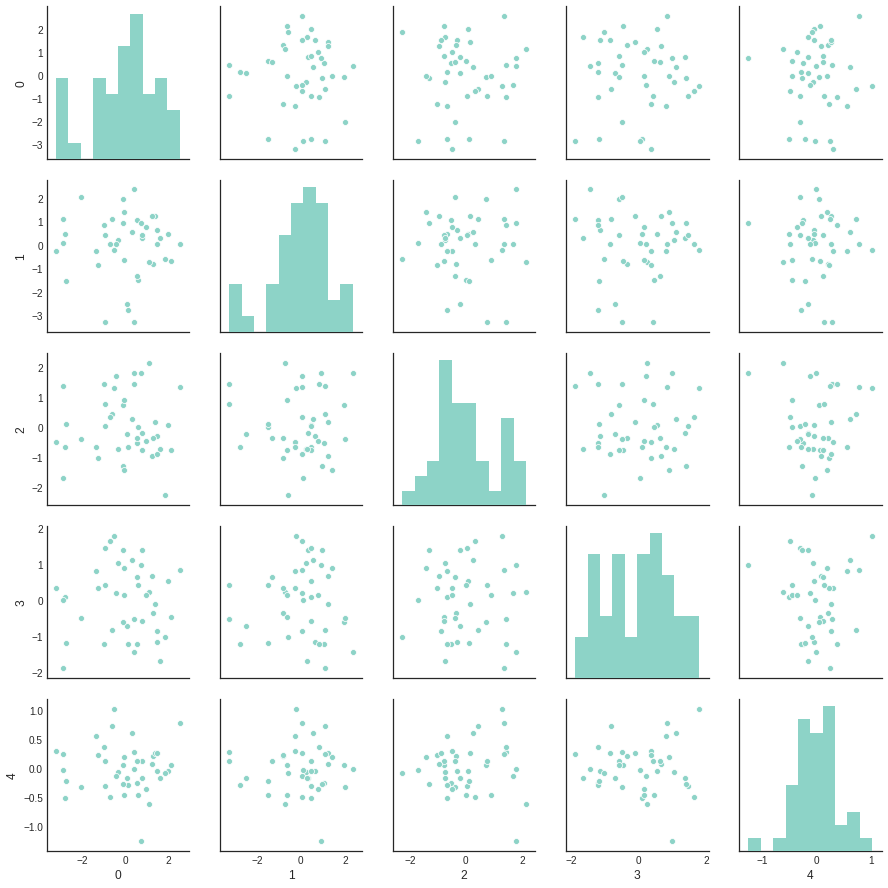

In [0]:
sns.pairplot(Proj_data_df)

In [0]:
#Prediction
prediction_test=model_CV.predict(X_test_std_5D)

In [0]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy_test:",metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols])))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_test,np.array(data_test_df[Dependent_cols])))

Accuracy_test: 0.8837209302325582
Confusion Matrix:
 [[ 1  0  0]
 [ 0 31  5]
 [ 0  0  6]]


In [0]:
Accuracy_KMeans_SVC.loc[7,'Cluster_Name']='data_df_clstr3'
Accuracy_KMeans_SVC.loc[7,'Model']='model_SVC'
Accuracy_KMeans_SVC.loc[7,'PCA_Applied']='Y'
Accuracy_KMeans_SVC.loc[7,'Train_Accuracy']=metrics.accuracy_score(prediction_valid,np.array(data_valid_df[Dependent_cols]))
Accuracy_KMeans_SVC.loc[7,'Test_Accuracy']= metrics.accuracy_score(prediction_test,np.array(data_test_df[Dependent_cols]))
Accuracy_KMeans_SVC

Cluster_Name      Model Train_Accuracy Test_Accuracy PCA_Applied
0  data_df_clstr0  model_SVC           0.95      0.982456          No
1  data_df_clstr1  model_SVC       0.821429           0.9          No
2  data_df_clstr2  model_SVC       0.722222      0.776316          No
3  data_df_clstr3  model_SVC       0.966667      0.953488          No
4  data_df_clstr0  model_SVC           0.65      0.649123           Y
5  data_df_clstr1  model_SVC       0.303571         0.475           Y
6  data_df_clstr2  model_SVC       0.407407          0.25           Y
7  data_df_clstr3  model_SVC            0.7      0.883721           Y

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

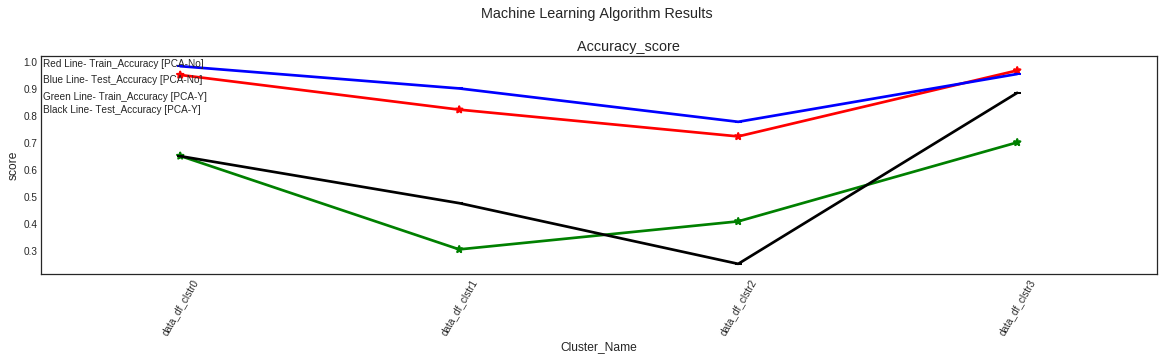

In [0]:
plt.figure(figsize=(20,4))
sns.pointplot(y=Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='No']['Train_Accuracy'].values, x =Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='No']['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'r',markers=["*"],label = 'accuracy_score')
sns.pointplot(y=Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='No']['Test_Accuracy'].values,  x =Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='No']['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'b',markers=["_"],label = 'accuracy_score')

sns.pointplot(y=Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='Y']['Train_Accuracy'].values, x =Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='Y']['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'g',markers=["*"],label = 'accuracy_score')
sns.pointplot(y=Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='Y']['Test_Accuracy'].values,  x =Accuracy_KMeans_SVC[Accuracy_KMeans_SVC['PCA_Applied']=='Y']['Cluster_Name'].values, data = Accuracy_KMeans_SVC , color = 'black',markers=["_"],label = 'accuracy_score')

plt.text(-0.49,0.98,'Red Line- Train_Accuracy [PCA-No]',rotation=0)
plt.text(-0.49,0.92,'Blue Line- Test_Accuracy [PCA-No]',rotation=0)
plt.text(-0.49,0.86,'Green Line- Train_Accuracy [PCA-Y]',rotation=0)
plt.text(-0.49,0.81,'Black Line- Test_Accuracy [PCA-Y]',rotation=0)

plt.title('Machine Learning Algorithm Results \n\n               Accuracy_score')
plt.xlabel('Cluster_Name')
plt.ylabel('score')
plt.xticks(rotation=60)


In [0]:
## We have more accuracy without PCA then with using PCA

In [0]:
######################################### FINISH ########################################################